In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2020vs2021.csv')
df_month = pd.read_csv('ByMonth.csv')

In [3]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %"
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65


In [4]:
df = df[df['Области']!='Общо']

In [5]:
df.describe()

,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %"
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,217.142857,20.035714,271.750000,203.928571,16.535714,254.321429,13.214286,7.885714,3.500000,70.334643,17.428571,8.250714
std,177.333483,13.223106,221.728333,172.475855,9.465266,212.750254,21.712528,17.896444,11.792967,322.953653,38.931496,21.852402
min,44.000000,2.000000,52.000000,47.000000,3.000000,58.000000,-36.000000,-33.640000,-10.000000,-57.140000,-50.000000,-40.650000
25%,96.250000,9.750000,126.250000,94.000000,10.000000,121.250000,-1.000000,-0.582500,-4.000000,-25.695000,-15.250000,-5.992500
50%,158.000000,19.500000,192.000000,141.000000,14.000000,178.000000,16.500000,6.580000,-0.500000,-3.335000,16.000000,7.340000
75%,263.500000,27.250000,337.500000,251.000000,19.250000,326.000000,28.250000,18.807500,9.000000,58.260000,39.750000,22.545000
max,731.000000,54.000000,934.000000,701.000000,38.000000,881.000000,54.000000,50.550000,51.000000,1700.000000,106.000000,56.480000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Области                 28 non-null     object 
 1   ПТП, бр., 2021 г.       28 non-null     int64  
 2   Загинали, бр., 2021 г.  28 non-null     int64  
 3   Ранени, бр., 2021 г.    28 non-null     int64  
 4   ПТП, бр., 2020 г.       28 non-null     int64  
 5   Загинали, бр., 2020 г.  28 non-null     int64  
 6   Ранени, бр., 2020 г.    28 non-null     int64  
 7   Разлика ПТП, бр.        28 non-null     int64  
 8   Разлика ПТП, %          28 non-null     float64
 9   Разлика загинали, бр.   28 non-null     int64  
 10  Разлика загинали, %     28 non-null     float64
 11  Разлика ранени, бр.     28 non-null     int64  
 12  Разлика ранени, %       28 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 3.1+ KB


In [7]:
df['Total Occurrences'] = df['ПТП, бр., 2021 г.'] + df['ПТП, бр., 2020 г.']
df['Total Deaths'] = df['Загинали, бр., 2021 г.'] + df['Загинали, бр., 2020 г.']
df['Total Injuries'] = df['Ранени, бр., 2021 г.'] + df['Ранени, бр., 2020 г.']

#Check top total occurences
df.sort_values('Total Occurrences', ascending = False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
15,ПЛОВДИВ,731,34,934,701,38,881,30,4.28,-4,-10.53,53,6.02,1432,72,1815
22,СОФИЯ,649,52,741,622,35,747,27,4.34,17,48.57,-6,-0.80,1271,87,1488
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388


In [8]:
#Check top total deaths
df.sort_values('Total Deaths', ascending = False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
22,СОФИЯ,649,52,741,622,35,747,27,4.34,17,48.57,-6,-0.80,1271,87,1488
15,ПЛОВДИВ,731,34,934,701,38,881,30,4.28,-4,-10.53,53,6.02,1432,72,1815
21,СОФИЙСКА,155,34,153,149,34,178,6,4.03,0,0.00,-25,-14.04,304,68,331


In [9]:
#Check top total injuries 
df.sort_values('Total Injuries', ascending = False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
15,ПЛОВДИВ,731,34,934,701,38,881,30,4.28,-4,-10.53,53,6.02,1432,72,1815
22,СОФИЯ,649,52,741,622,35,747,27,4.34,17,48.57,-6,-0.80,1271,87,1488
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388


In [10]:
#Check top occurences increase 
df.sort_values('Разлика ПТП, бр.', ascending=False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
23,СТАРА ЗАГОРА,358,27,453,304,31,355,54,17.76,-4,-12.90,98,27.61,662,58,808
19,СЛИВЕН,137,13,169,91,23,108,46,50.55,-10,-43.48,61,56.48,228,36,277
10,ЛОВЕЧ,205,29,280,161,17,235,44,27.33,12,70.59,45,19.15,366,46,515


In [11]:
#Check top deaths increase
df.sort_values('Разлика загинали, бр.', ascending=False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
13,ПЕРНИК,62,54,72,55,3,62,7,12.73,51,1700.00,10,16.13,117,57,134
22,СОФИЯ,649,52,741,622,35,747,27,4.34,17,48.57,-6,-0.80,1271,87,1488
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546


In [12]:
#Check top injuries increase
df.sort_values('Разлика ранени, бр.', ascending=False).head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970
23,СТАРА ЗАГОРА,358,27,453,304,31,355,54,17.76,-4,-12.90,98,27.61,662,58,808
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710


In [13]:
#Check top occurences decrease 
df.sort_values('Разлика ПТП, бр.').head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
6,ГАБРОВО,71,7,73,107,9,123,-36,-33.64,-2,-22.22,-50,-40.65,178,16,196
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388


In [14]:
#Check top deaths decrease
df.sort_values('Разлика загинали, бр.').head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
19,СЛИВЕН,137,13,169,91,23,108,46,50.55,-10,-43.48,61,56.48,228,36,277
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388


In [15]:
#Check top injuries decrease
df.sort_values('Разлика ранени, бр.').head(3)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
6,ГАБРОВО,71,7,73,107,9,123,-36,-33.64,-2,-22.22,-50,-40.65,178,16,196
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210
21,СОФИЙСКА,155,34,153,149,34,178,6,4.03,0,0.00,-25,-14.04,304,68,331


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Области                 28 non-null     object 
 1   ПТП, бр., 2021 г.       28 non-null     int64  
 2   Загинали, бр., 2021 г.  28 non-null     int64  
 3   Ранени, бр., 2021 г.    28 non-null     int64  
 4   ПТП, бр., 2020 г.       28 non-null     int64  
 5   Загинали, бр., 2020 г.  28 non-null     int64  
 6   Ранени, бр., 2020 г.    28 non-null     int64  
 7   Разлика ПТП, бр.        28 non-null     int64  
 8   Разлика ПТП, %          28 non-null     float64
 9   Разлика загинали, бр.   28 non-null     int64  
 10  Разлика загинали, %     28 non-null     float64
 11  Разлика ранени, бр.     28 non-null     int64  
 12  Разлика ранени, %       28 non-null     float64
 13  Total Occurrences       28 non-null     int64  
 14  Total Deaths            28 non-null     int6

In [17]:
#Create bar charts to visualize data
"""
sns.set(rc={'figure.figsize':(50,20)})
cols = ['Ранени, бр., 2021 г.', 'Загинали, бр., 2021 г.', 'Ранени, бр., 2020 г.', 'Загинали, бр., 2020 г.']

#Create visuals for injuries 
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[0])
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[2]).set(title = "Injured 2020 vs 2021")
plt.legend(labels=["2021", "2020"])
plt.show()

sns.barplot(data = df.loc[:27], x = 'Области', y = cols[1])
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[3]).set(title = "Fatal 2020 vs 2021")
plt.legend(labels = ['2021', '2020'])
plt.show()
"""

'\nsns.set(rc={\'figure.figsize\':(50,20)})\ncols = [\'Ранени, бр., 2021 г.\', \'Загинали, бр., 2021 г.\', \'Ранени, бр., 2020 г.\', \'Загинали, бр., 2020 г.\']\n\n#Create visuals for injuries \nsns.barplot(data = df.loc[:27], x = \'Области\', y = cols[0])\nsns.barplot(data = df.loc[:27], x = \'Области\', y = cols[2]).set(title = "Injured 2020 vs 2021")\nplt.legend(labels=["2021", "2020"])\nplt.show()\n\nsns.barplot(data = df.loc[:27], x = \'Области\', y = cols[1])\nsns.barplot(data = df.loc[:27], x = \'Области\', y = cols[3]).set(title = "Fatal 2020 vs 2021")\nplt.legend(labels = [\'2021\', \'2020\'])\nplt.show()\n'

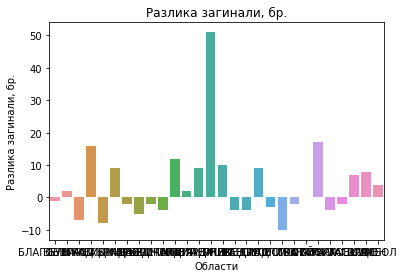

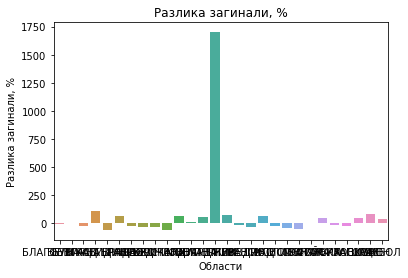

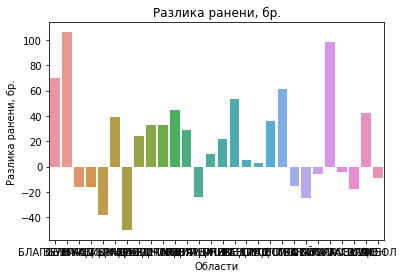

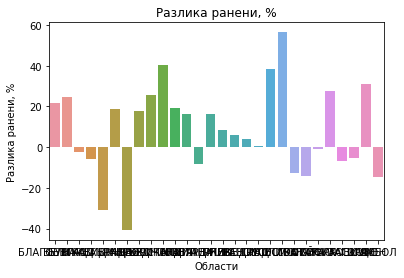

In [18]:
#Bar graph total difference of deaths
columns = ['Разлика загинали, бр.', 'Разлика загинали, %', 'Разлика ранени, бр.', 'Разлика ранени, %']
for col in columns: 
    sns.barplot(data = df.loc[:27], x = 'Области', y = col).set_title(col)
    plt.show()

In [19]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210


In [20]:
#TODO
# 1) Fix visuals
# 2) Do test hypothesis to see significant difference between years for a given region
# 3) Plot in a world map the number of deaths/injuries and add visual marker when statistical significance occurs

In [21]:
app_2021 = []
app_2020 = []
for col in df.columns:
    if '2021' in col:
        app_2021.append(col)
    elif '2020' in col:
        app_2020.append(col)
    else: 
        app_2021.append(col)

In [22]:
app_2020

['ПТП, бр., 2020 г.', 'Загинали, бр., 2020 г.', 'Ранени, бр., 2020 г.']

In [23]:
df1 = df.drop(app_2020, axis = 1)

In [24]:
df2 = df.drop(app_2021, axis = 1)

In [25]:
df_viz = pd.concat([df1,df2])
df_viz.reset_index(inplace = True)

In [26]:
df_viz.drop('index', axis = 1, inplace=True)

In [27]:
df_viz

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,"ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г."
0,БЛАГОЕВГРАД,274.0,14.0,390.0,25.0,10.04,-1.0,-6.67,70.0,21.88,523.0,29.0,710.0,NaN,NaN,NaN
1,БУРГАС,396.0,28.0,538.0,29.0,7.90,2.0,7.69,106.0,24.54,763.0,54.0,970.0,NaN,NaN,NaN
2,ВАРНА,550.0,22.0,686.0,-19.0,-3.34,-7.0,-24.14,-16.0,-2.28,1119.0,51.0,1388.0,NaN,NaN,NaN
3,ВЕЛИКО ТЪРНОВО,218.0,30.0,265.0,0.0,0.00,16.0,114.29,-16.0,-5.69,436.0,44.0,546.0,NaN,NaN,NaN
4,ВИДИН,71.0,6.0,86.0,-24.0,-25.26,-8.0,-57.14,-38.0,-30.65,166.0,20.0,210.0,NaN,NaN,NaN
5,ВРАЦА,183.0,23.0,248.0,28.0,18.06,9.0,64.29,39.0,18.66,338.0,37.0,457.0,NaN,NaN,NaN
6,ГАБРОВО,71.0,7.0,73.0,-36.0,-33.64,-2.0,-22.22,-50.0,-40.65,178.0,16.0,196.0,NaN,NaN,NaN
7,ДОБРИЧ,123.0,13.0,158.0,16.0,14.95,-5.0,-27.78,24.0,17.91,230.0,31.0,292.0,NaN,NaN,NaN
8,КЪРДЖАЛИ,129.0,4.0,161.0,30.0,30.30,-2.0,-33.33,33.0,25.78,228.0,10.0,289.0,NaN,NaN,NaN
9,КЮСТЕНДИЛ,91.0,3.0,115.0,17.0,22.97,-4.0,-57.14,33.0,40.24,165.0,10.0,197.0,NaN,NaN,NaN


In [28]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Области                 28 non-null     object 
 1   ПТП, бр., 2021 г.       28 non-null     float64
 2   Загинали, бр., 2021 г.  28 non-null     float64
 3   Ранени, бр., 2021 г.    28 non-null     float64
 4   Разлика ПТП, бр.        28 non-null     float64
 5   Разлика ПТП, %          28 non-null     float64
 6   Разлика загинали, бр.   28 non-null     float64
 7   Разлика загинали, %     28 non-null     float64
 8   Разлика ранени, бр.     28 non-null     float64
 9   Разлика ранени, %       28 non-null     float64
 10  Total Occurrences       28 non-null     float64
 11  Total Deaths            28 non-null     float64
 12  Total Injuries          28 non-null     float64
 13  ПТП, бр., 2020 г.       28 non-null     float64
 14  Загинали, бр., 2020 г.  28 non-null     floa

In [29]:
df_viz['Year'] = df_viz['Области']
for index, row in df_viz.iterrows():
    if str(row['ПТП, бр., 2021 г.']) == 'nan':
        df_viz['Year'].iloc[index] = '2020'
    else: 
        df_viz['Year'].iloc[index] = '2021'

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
df_viz

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,"ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.",Year
0,БЛАГОЕВГРАД,274.0,14.0,390.0,25.0,10.04,-1.0,-6.67,70.0,21.88,523.0,29.0,710.0,NaN,NaN,NaN,2021
1,БУРГАС,396.0,28.0,538.0,29.0,7.90,2.0,7.69,106.0,24.54,763.0,54.0,970.0,NaN,NaN,NaN,2021
2,ВАРНА,550.0,22.0,686.0,-19.0,-3.34,-7.0,-24.14,-16.0,-2.28,1119.0,51.0,1388.0,NaN,NaN,NaN,2021
3,ВЕЛИКО ТЪРНОВО,218.0,30.0,265.0,0.0,0.00,16.0,114.29,-16.0,-5.69,436.0,44.0,546.0,NaN,NaN,NaN,2021
4,ВИДИН,71.0,6.0,86.0,-24.0,-25.26,-8.0,-57.14,-38.0,-30.65,166.0,20.0,210.0,NaN,NaN,NaN,2021
5,ВРАЦА,183.0,23.0,248.0,28.0,18.06,9.0,64.29,39.0,18.66,338.0,37.0,457.0,NaN,NaN,NaN,2021
6,ГАБРОВО,71.0,7.0,73.0,-36.0,-33.64,-2.0,-22.22,-50.0,-40.65,178.0,16.0,196.0,NaN,NaN,NaN,2021
7,ДОБРИЧ,123.0,13.0,158.0,16.0,14.95,-5.0,-27.78,24.0,17.91,230.0,31.0,292.0,NaN,NaN,NaN,2021
8,КЪРДЖАЛИ,129.0,4.0,161.0,30.0,30.30,-2.0,-33.33,33.0,25.78,228.0,10.0,289.0,NaN,NaN,NaN,2021
9,КЮСТЕНДИЛ,91.0,3.0,115.0,17.0,22.97,-4.0,-57.14,33.0,40.24,165.0,10.0,197.0,NaN,NaN,NaN,2021


In [31]:
df_viz2020 = df_viz[['ПТП, бр., 2020 г.', 'Загинали, бр., 2020 г.', 'Ранени, бр., 2020 г.','Year']] 
df_viz2021 = df_viz[['ПТП, бр., 2021 г.', 'Загинали, бр., 2021 г.', 'Ранени, бр., 2021 г.','Year']]

In [32]:
df_viz2020.dropna(inplace=True)
df_viz2021.dropna(inplace=True)

<ipython-input-32-9e49f5459ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz2020.dropna(inplace=True)
<ipython-input-32-9e49f5459ada>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz2021.dropna(inplace=True)


In [33]:
df_viz2021.rename(columns = {'Загинали, бр., 2021 г.':'Deaths', 'Ранени, бр., 2021 г.':'Injured'}, inplace=True)

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [34]:
df_viz2020.rename(columns = {'Загинали, бр., 2020 г.':'Deaths', 'Ранени, бр., 2020 г.':'Injured'}, inplace=True)

In [35]:
df_viz2021

,"ПТП, бр., 2021 г.",Deaths,Injured,Year
0,274.0,14.0,390.0,2021
1,396.0,28.0,538.0,2021
2,550.0,22.0,686.0,2021
3,218.0,30.0,265.0,2021
4,71.0,6.0,86.0,2021
5,183.0,23.0,248.0,2021
6,71.0,7.0,73.0,2021
7,123.0,13.0,158.0,2021
8,129.0,4.0,161.0,2021
9,91.0,3.0,115.0,2021


In [36]:
df_viz2021['Region'] = df['Области']
df_viz2020['Region'] = df['Области']
df_viz2021['Occurences'] = df_viz2021['ПТП, бр., 2021 г.']
df_viz2020['Occurences'] = df_viz2020['ПТП, бр., 2020 г.']

<ipython-input-36-1072a9625d2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz2021['Region'] = df['Области']
<ipython-input-36-1072a9625d2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz2020['Region'] = df['Области']
<ipython-input-36-1072a9625d2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [37]:
df_viz2020.reset_index(inplace=True)

In [38]:
df_viz2020['Region'] = df['Области']

<ipython-input-38-243dd10ae2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz2020['Region'] = df['Области']


In [39]:
df_viz2020.drop('index', axis=1, inplace=True)

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
for_viz = pd.concat([df_viz2020, df_viz2021])

In [41]:
for_viz.reset_index(inplace=True)

In [42]:
for_viz.drop('index', axis = 1, inplace=True)

In [43]:
for_viz[['Deaths', 'Injured', 'Region', 'Occurences', 'Year']]

,Deaths,Injured,Region,Occurences,Year
0,15.0,320.0,БЛАГОЕВГРАД,249.0,2020
1,26.0,432.0,БУРГАС,367.0,2020
2,29.0,702.0,ВАРНА,569.0,2020
3,14.0,281.0,ВЕЛИКО ТЪРНОВО,218.0,2020
4,14.0,124.0,ВИДИН,95.0,2020
5,14.0,209.0,ВРАЦА,155.0,2020
6,9.0,123.0,ГАБРОВО,107.0,2020
7,18.0,134.0,ДОБРИЧ,107.0,2020
8,6.0,128.0,КЪРДЖАЛИ,99.0,2020
9,7.0,82.0,КЮСТЕНДИЛ,74.0,2020


In [44]:
for_viz = for_viz[for_viz['Region']!='Общо']

In [45]:
for_viz

,"ПТП, бр., 2020 г.",Deaths,Injured,Year,Region,Occurences,"ПТП, бр., 2021 г."
0,249.0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,NaN
1,367.0,26.0,432.0,2020,БУРГАС,367.0,NaN
2,569.0,29.0,702.0,2020,ВАРНА,569.0,NaN
3,218.0,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,NaN
4,95.0,14.0,124.0,2020,ВИДИН,95.0,NaN
5,155.0,14.0,209.0,2020,ВРАЦА,155.0,NaN
6,107.0,9.0,123.0,2020,ГАБРОВО,107.0,NaN
7,107.0,18.0,134.0,2020,ДОБРИЧ,107.0,NaN
8,99.0,6.0,128.0,2020,КЪРДЖАЛИ,99.0,NaN
9,74.0,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,NaN


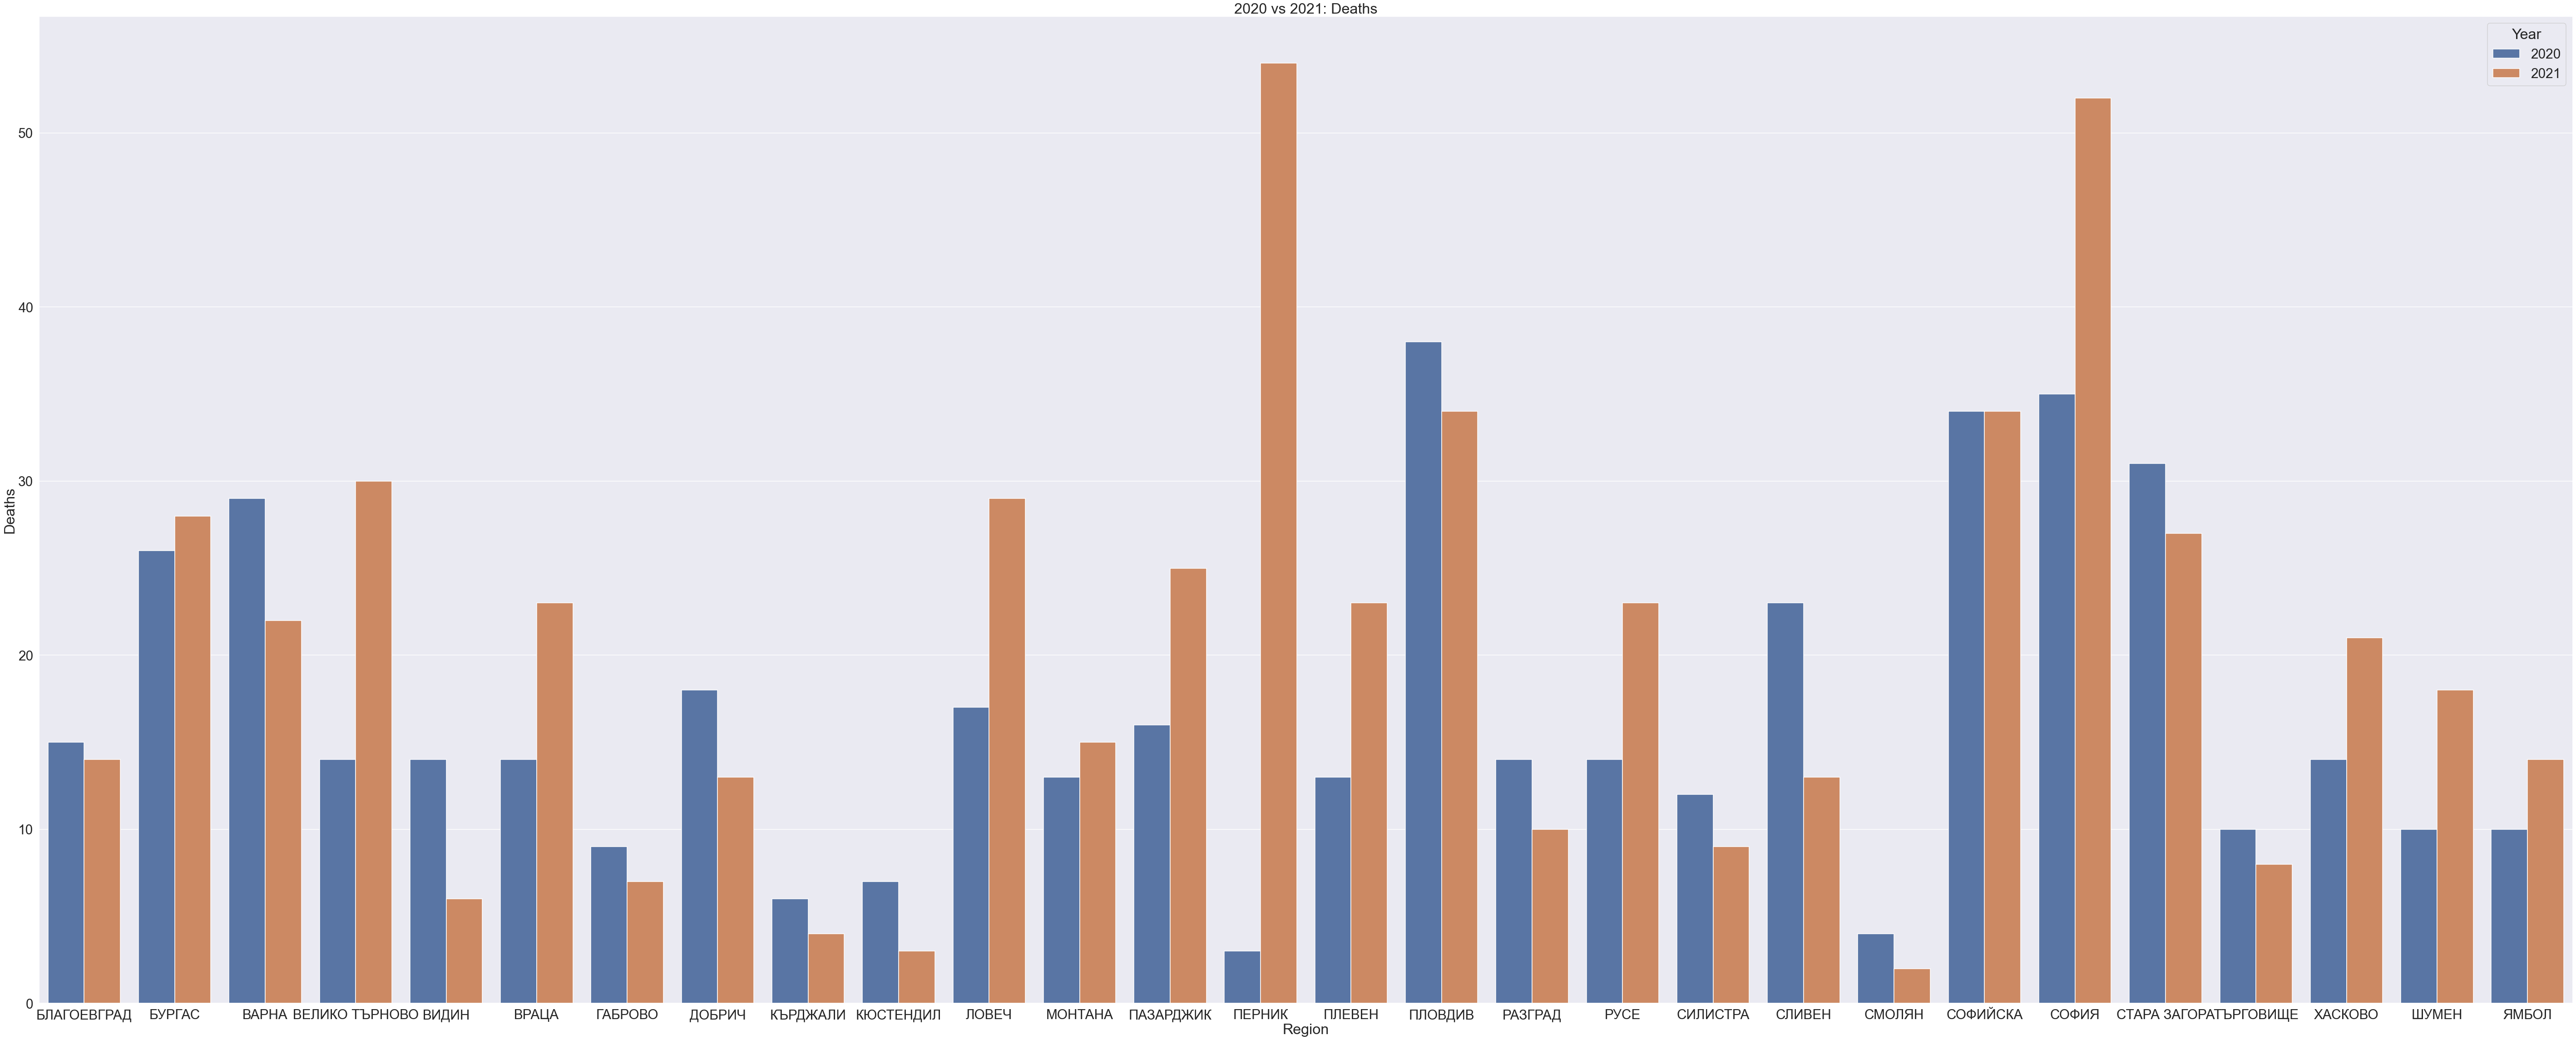

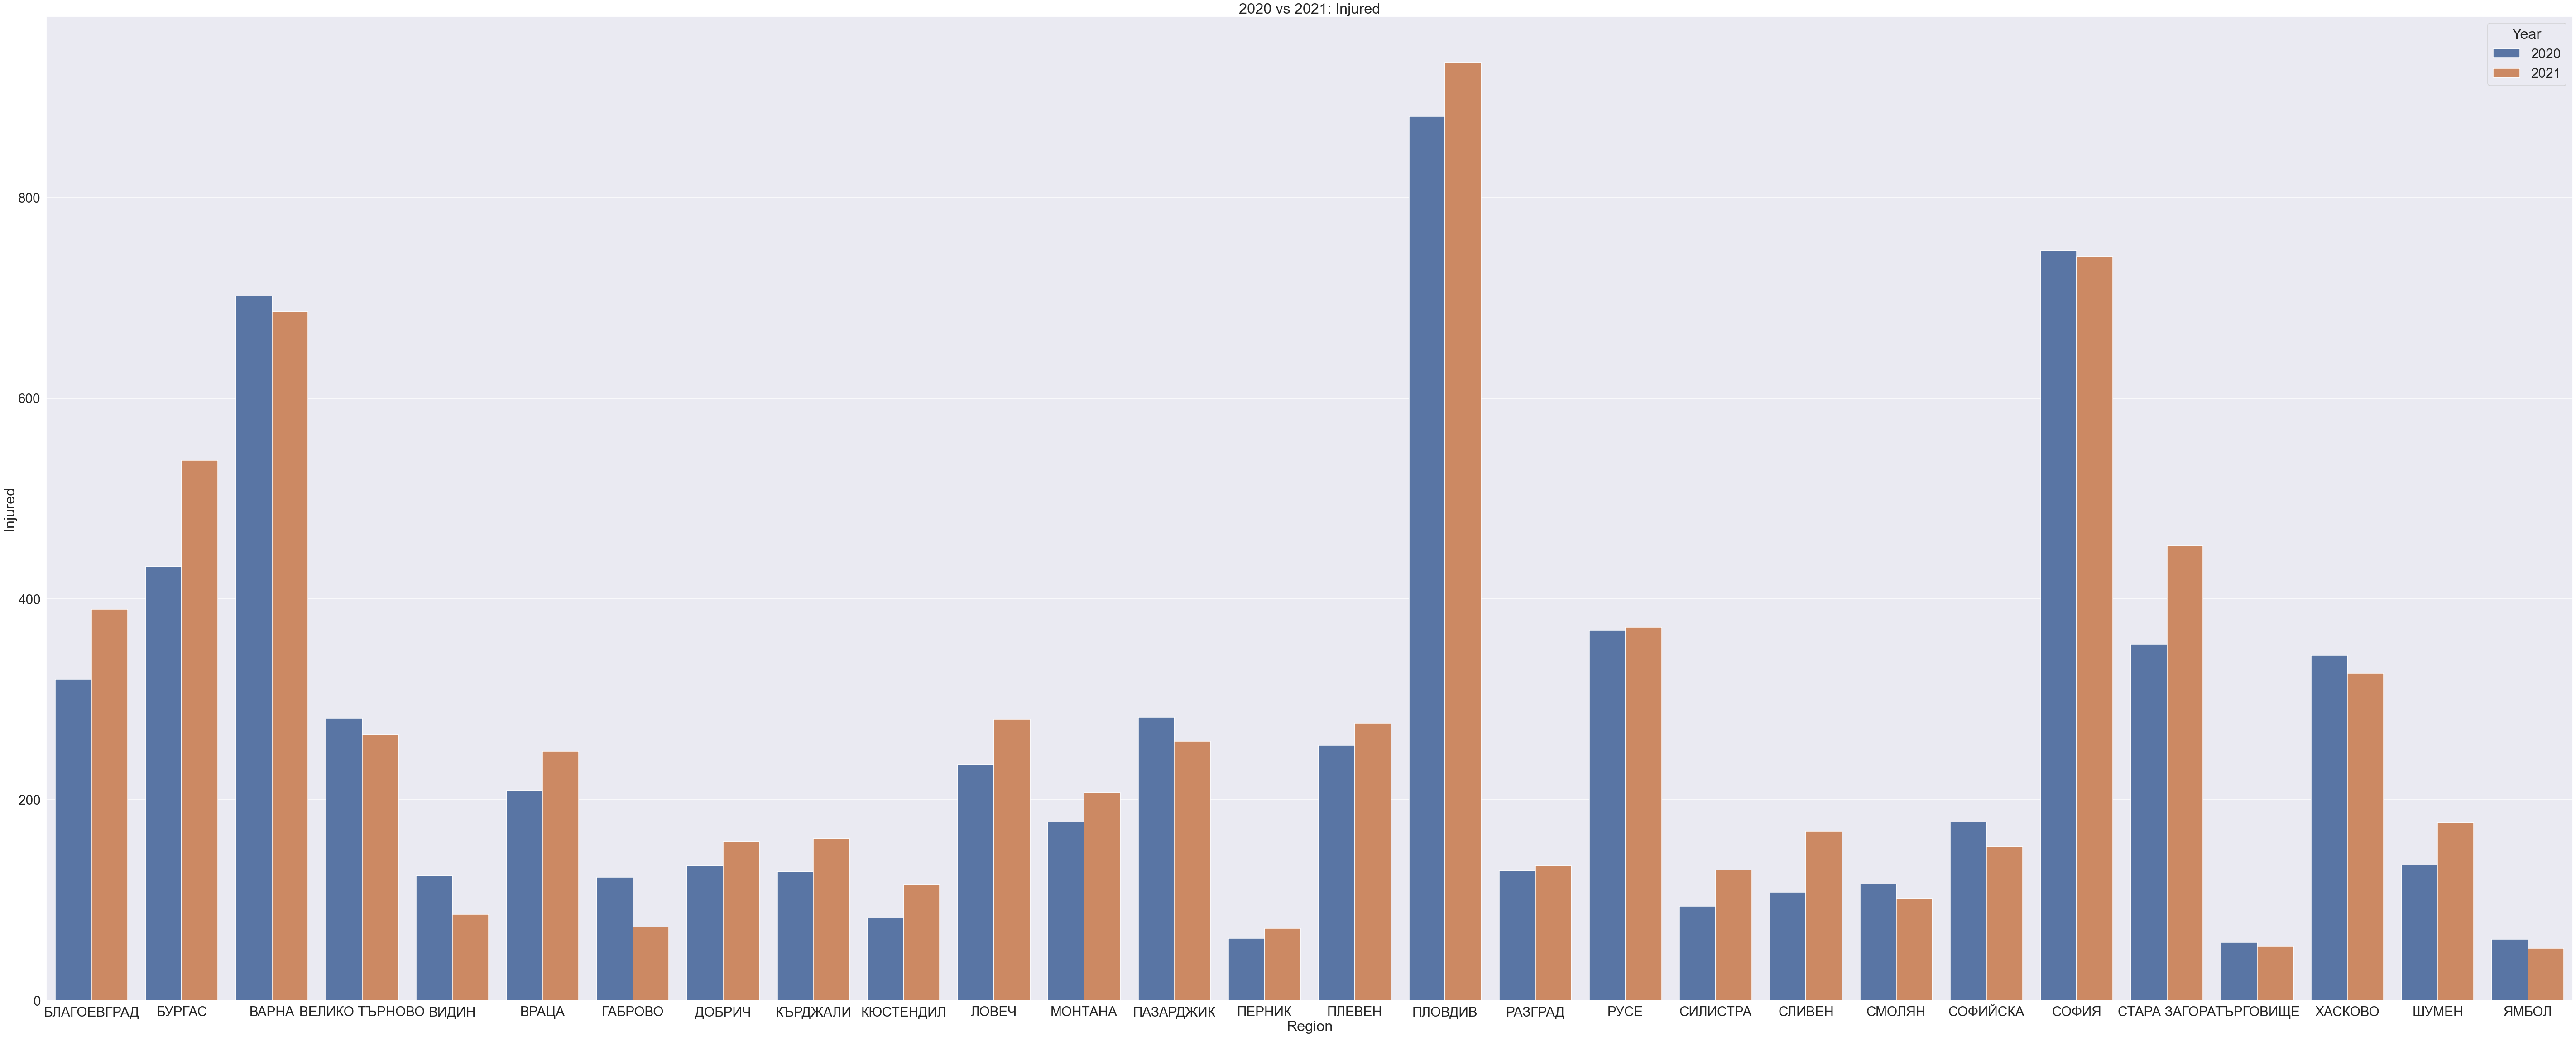

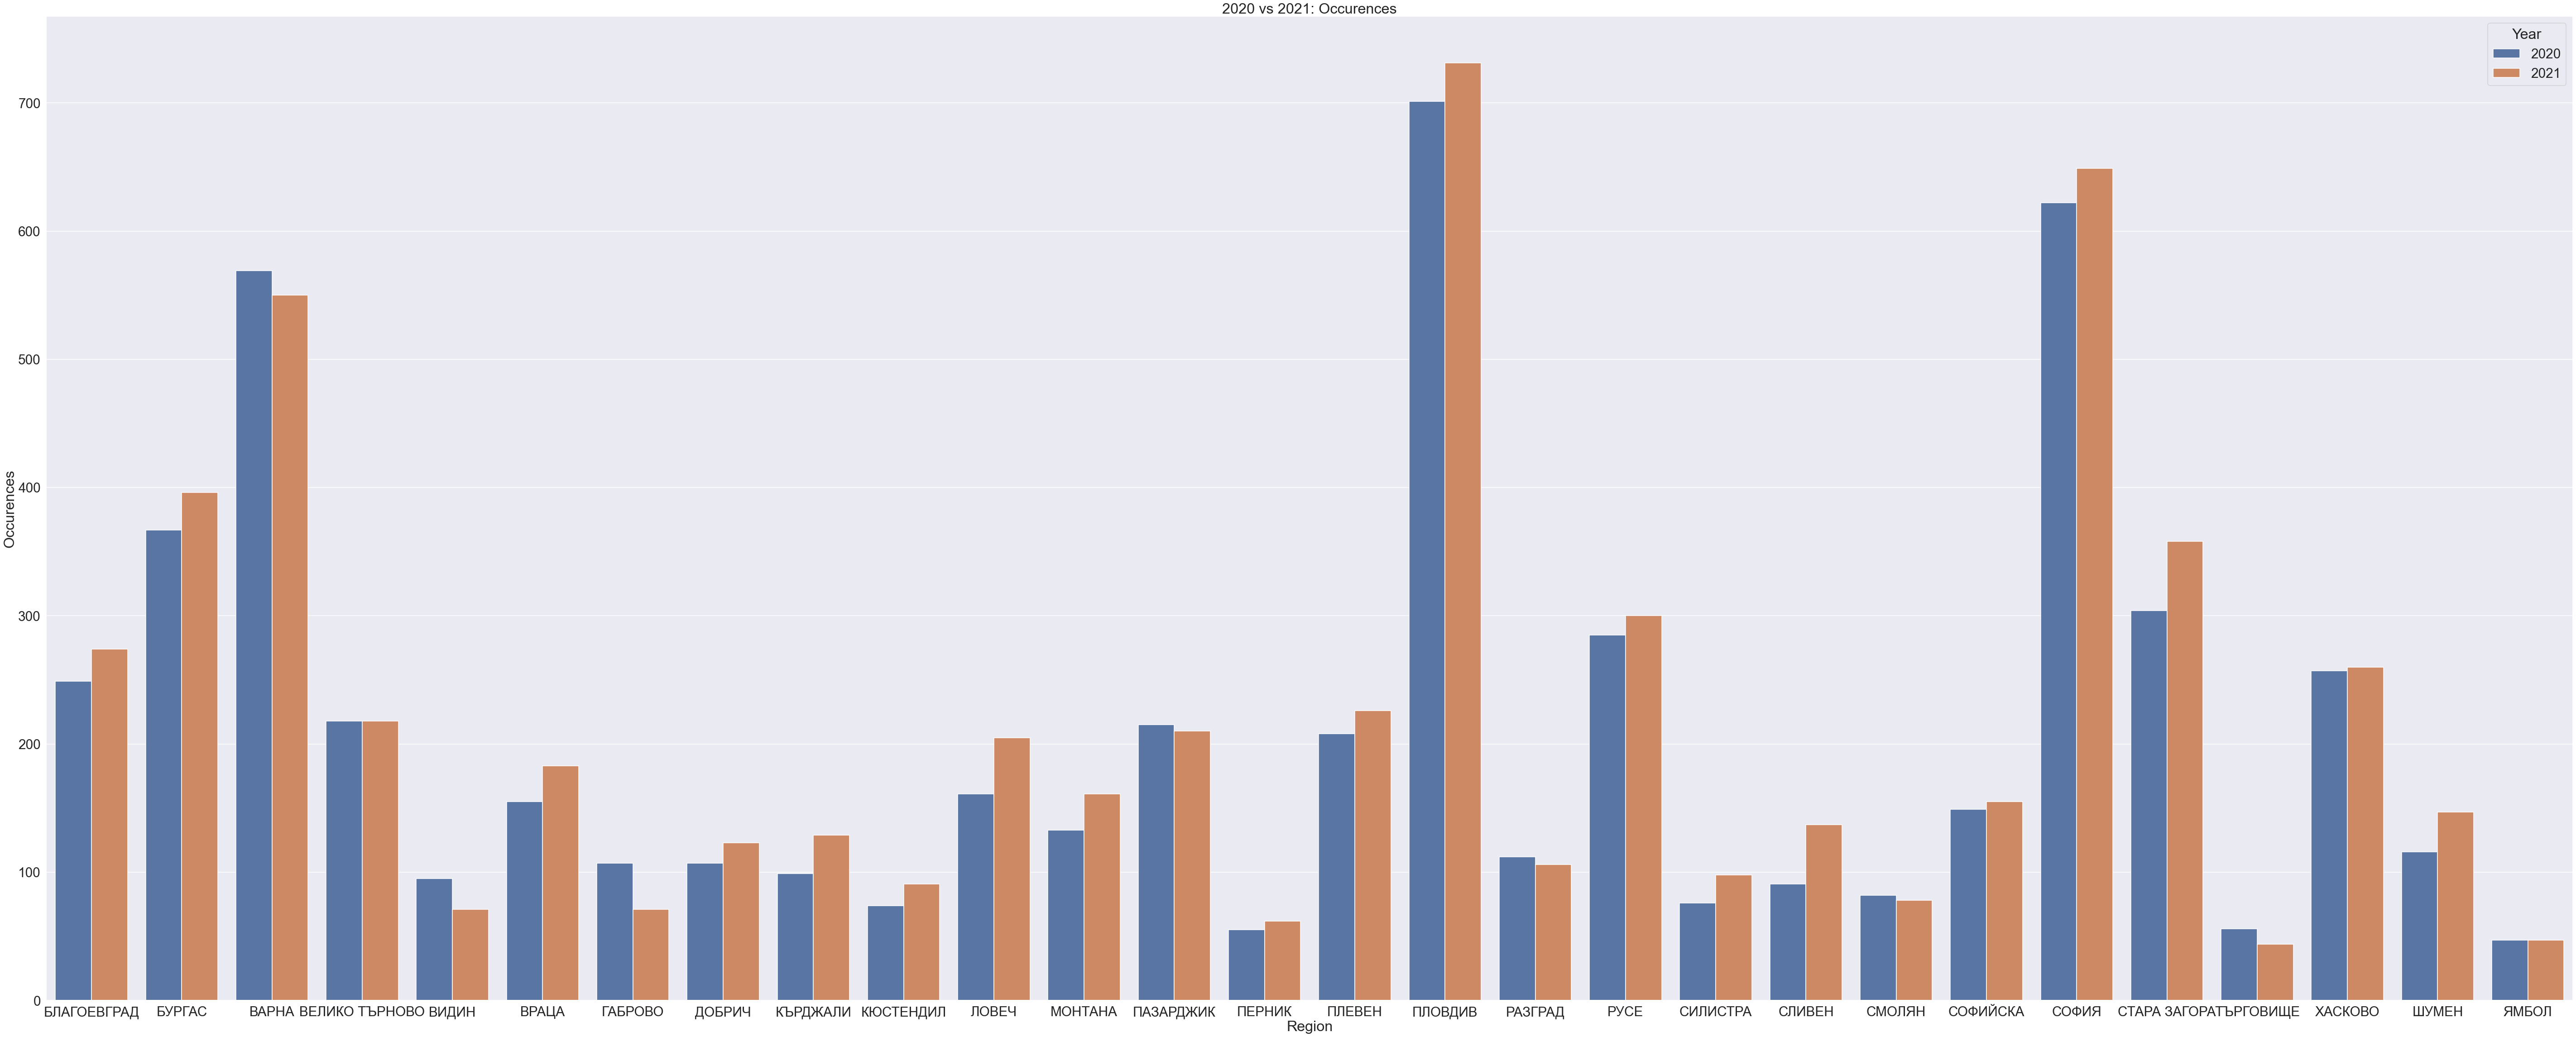

In [46]:
sns.set(rc={'figure.figsize':(100,40)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
cols = ['Deaths', 'Injured', 'Occurences']
for col in cols:
    sns.barplot(data = for_viz, x = 'Region', y = col, hue = 'Year').set_title("2020 vs 2021: " + col)
    plt.show()

In [47]:
#Do statistical significance analysis
for_viz['Total'] = for_viz['Injured'] + for_viz['Deaths']

In [48]:
for_viz.drop(['ПТП, бр., 2020 г.', 'ПТП, бр., 2021 г.'], axis = 1, inplace=True)
for_viz

,Deaths,Injured,Year,Region,Occurences,Total
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0
1,26.0,432.0,2020,БУРГАС,367.0,458.0
2,29.0,702.0,2020,ВАРНА,569.0,731.0
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0
4,14.0,124.0,2020,ВИДИН,95.0,138.0
5,14.0,209.0,2020,ВРАЦА,155.0,223.0
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0


In [49]:
#Get the difference in Years that will be tested to see if it is significant
to_test = for_viz.groupby(['Year']).mean()
death_diff_to_test = to_test.iloc[1].Deaths - to_test.iloc[0].Deaths
injury_diff_to_test = to_test.iloc[1].Injured - to_test.iloc[0].Injured

In [50]:
to_test

,Deaths,Injured,Occurences,Total
Year,,,,
2020,16.535714,254.321429,203.928571,270.857143
2021,20.035714,271.750000,217.142857,291.785714


In [51]:
print("Deaths difference to test stat significance between 2020 and 2021: ",death_diff_to_test)
print("Injuries difference to test stat significance between 2020 and 2021: ",injury_diff_to_test)

Deaths difference to test stat significance between 2020 and 2021:  3.5
Injuries difference to test stat significance between 2020 and 2021:  17.428571428571416


In [52]:
#Now get mean difference between multiple categories
cat_means = for_viz.groupby(['Region']).mean()

In [53]:
for_viz

,Deaths,Injured,Year,Region,Occurences,Total
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0
1,26.0,432.0,2020,БУРГАС,367.0,458.0
2,29.0,702.0,2020,ВАРНА,569.0,731.0
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0
4,14.0,124.0,2020,ВИДИН,95.0,138.0
5,14.0,209.0,2020,ВРАЦА,155.0,223.0
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0


In [54]:
for_viz.groupby('Year').sum()

,Deaths,Injured,Occurences,Total
Year,,,,
2020,463.0,7121.0,5710.0,7584.0
2021,561.0,7609.0,6080.0,8170.0


In [55]:
#Starting statistical analysis

#Create 2 dataframes
y2020 = for_viz[for_viz['Year']=='2020']
y2021 = for_viz[for_viz['Year']=='2021']

#Get mean of each year (deaths)
y2020_death_mean = y2020['Deaths'].mean()
y2021_death_mean = y2021['Deaths'].mean()

print(y2020_death_mean)
print(y2021_death_mean)

#Get test statistic
test_stat = for_viz['Deaths'].mean()

print(test_stat)

16.535714285714285
20.035714285714285
18.285714285714285


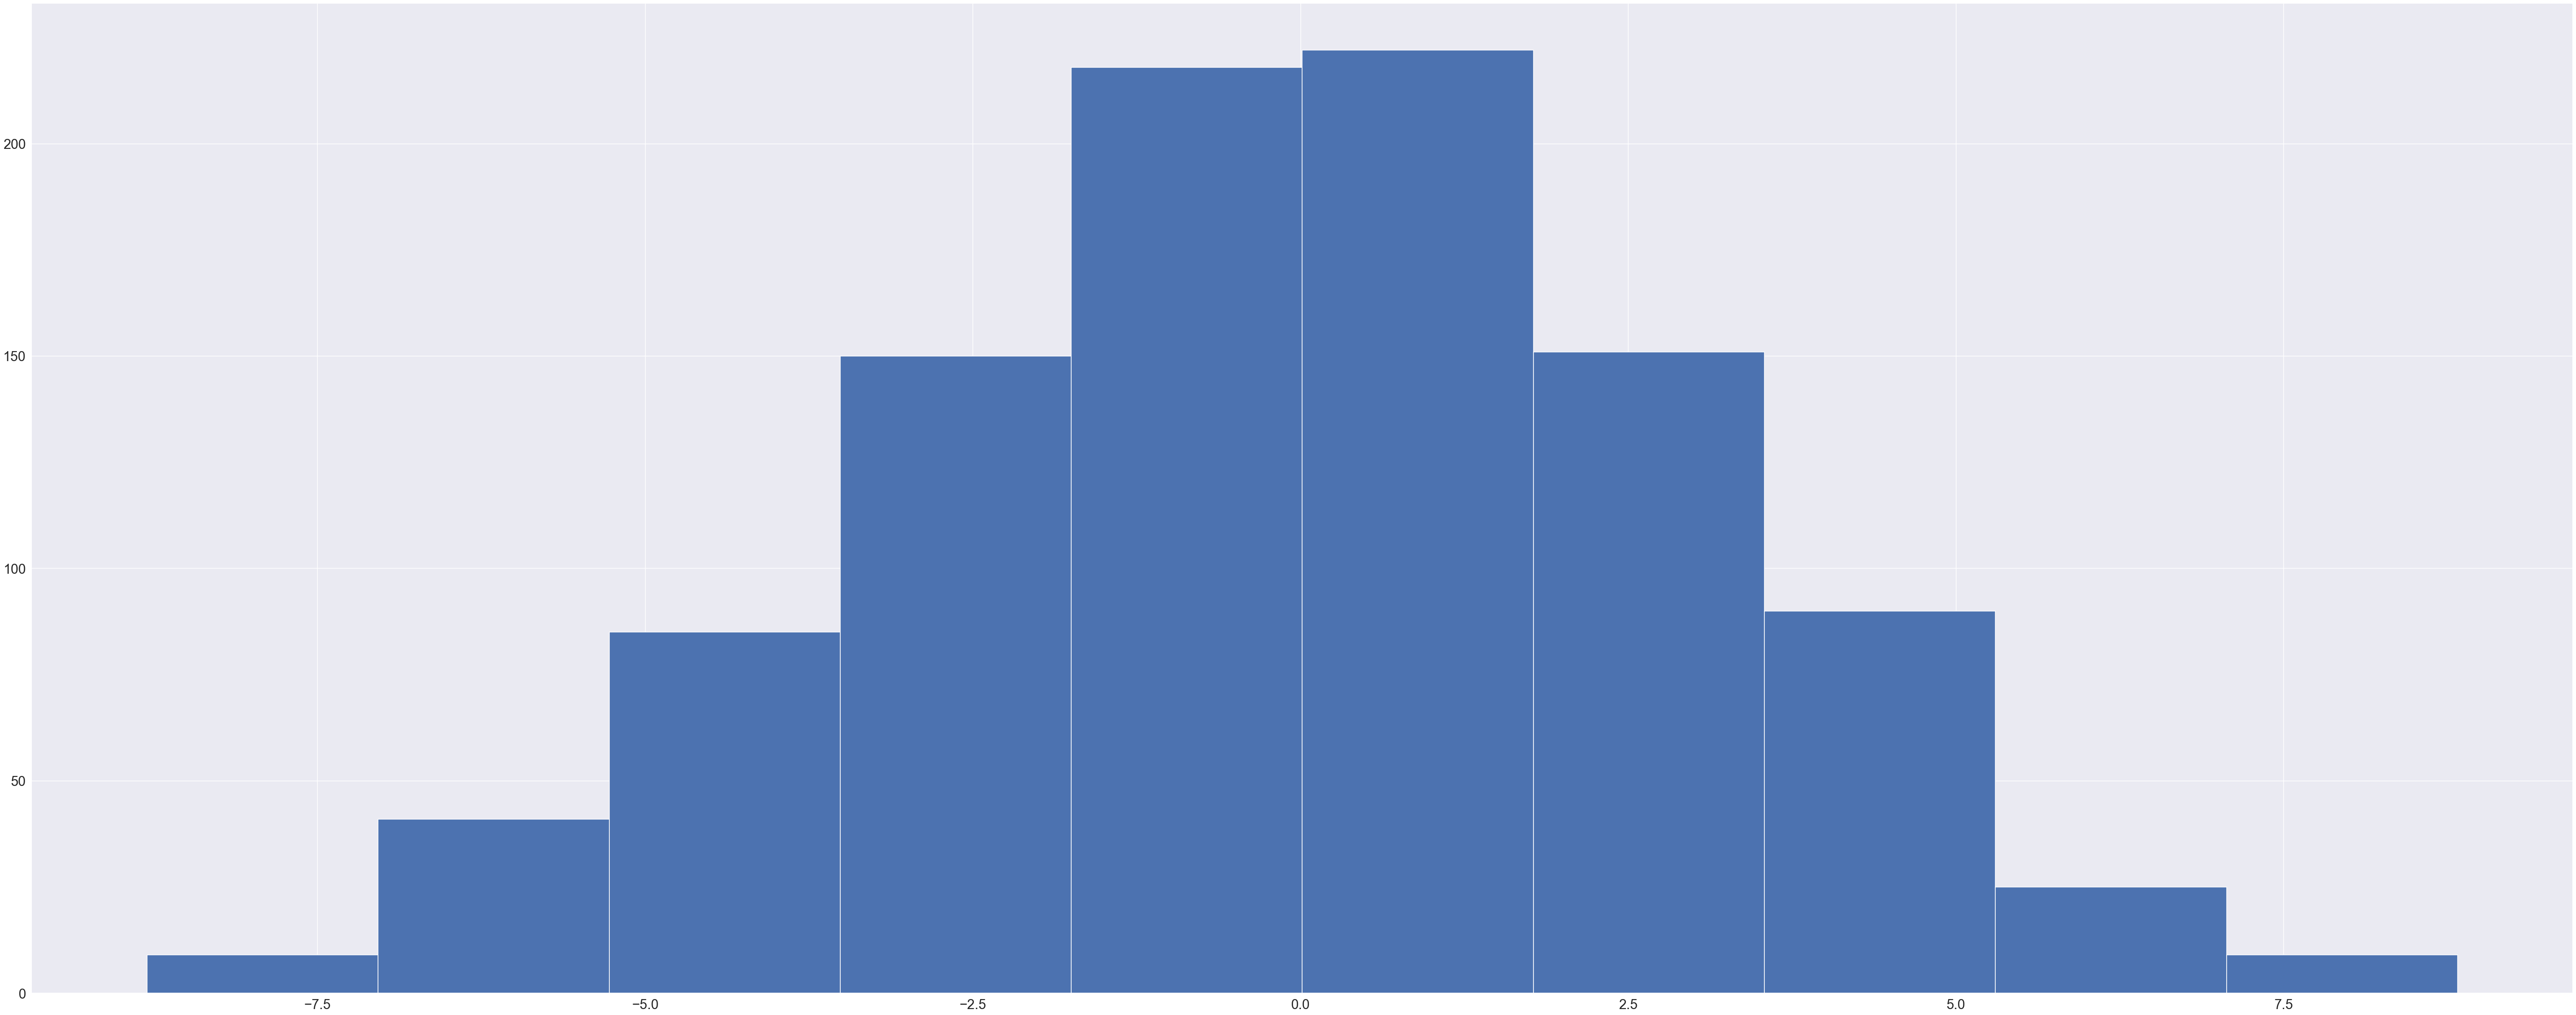

In [56]:
#Create permutation test
mean_difference = y2021_death_mean - y2020_death_mean
all_deaths = for_viz['Deaths']
mean_differences = []

for i in range(1000):
    #Populate two groups randmly
    group_a = []
    group_b = []

    for d in all_deaths: 
        rand_val = np.random.random()
        if rand_val > 0.5:
            group_a.append(d)
        else: 
            group_b.append(d)
    mean_group_a = np.mean(group_a)
    mean_group_b = np.mean(group_b)
    # find the itteration mean and append to our mean difference list
    iteration_mean_difference =  mean_group_a - mean_group_b
    mean_differences.append(iteration_mean_difference)

# use matplotlib to visulize the mean_differences list as a histogram
plt.hist(mean_differences)
plt.show()

In [57]:
total = 0

#for loop to check if random mean diff is greater than our mean difference
for mean_diff in mean_differences:
    if mean_diff >= mean_difference:
        total += 1

#p value calculated by calulating percentage of values greater then the mean difference
p_value = total / 1000

print(p_value)

0.124


In [58]:
#There's no statistical differnce between the 2020 and 2021 deaths as the p value is > 0.05

In [59]:
for_viz['Region'].unique()

array(['БЛАГОЕВГРАД', 'БУРГАС', 'ВАРНА', 'ВЕЛИКО ТЪРНОВО', 'ВИДИН',
       'ВРАЦА', 'ГАБРОВО', 'ДОБРИЧ', 'КЪРДЖАЛИ', 'КЮСТЕНДИЛ', 'ЛОВЕЧ',
       'МОНТАНА', 'ПАЗАРДЖИК', 'ПЕРНИК', 'ПЛЕВЕН', 'ПЛОВДИВ', 'РАЗГРАД',
       'РУСЕ', 'СИЛИСТРА', 'СЛИВЕН', 'СМОЛЯН', 'СОФИЙСКА', 'СОФИЯ',
       'СТАРА ЗАГОРА', 'ТЪРГОВИЩЕ', 'ХАСКОВО', 'ШУМЕН', 'ЯМБОЛ'],
      dtype=object)

In [60]:
#Now, let's create a statistical test for each region
#Starting statistical analysis

regions = for_viz['Region'].unique()
cols = ['Deaths', 'Injured', 'Occurences']

# Statistical testing for a certain category
for col in cols:
    sign_increase = []
    print('For ', col)
    for r in regions:
        #Create 2 dataframes, one for each year
        y2020 = for_viz[for_viz['Year']=='2020']
        y2021 = for_viz[for_viz['Year']=='2021']

        #Get values of a regions and a year, either 2020 or 2021
        y2020_death_mean_reg = y2020[y2020['Region']==r][col].to_numpy()
        y2021_death_mean_reg = y2021[y2021['Region']==r][col].to_numpy()

        #Create permutation test
        mean_difference = abs(y2021_death_mean_reg - y2020_death_mean_reg)
        
        #Get all the values for a given attribute
        #Will be used to create randomly the groups
        all_deaths = for_viz[col]
        mean_differences = []

        for j in range(1000):
            #Populate two groups randmly
            group_a = []
            group_b = []

            for d in all_deaths: 
                rand_val = np.random.random()
                if rand_val > 0.5:
                    group_a.append(d)
                else: 
                    group_b.append(d)
            mean_group_a = np.mean(group_a)
            mean_group_b = np.mean(group_b)
            # find the itteration mean and append to our mean difference list
            iteration_mean_difference =  mean_group_a - mean_group_b
            mean_differences.append(iteration_mean_difference)
            
        total = 0

        #for loop to check if random mean diff is greater than our mean difference
        for mean_diff in mean_differences:
            if mean_diff >= mean_difference:
                total += 1

        #p value calculated by calulating percentage of values greater then the mean difference
        p_value = total / 1000

        #print(p_value)

        if p_value > 0.05:
            pass
            #print('NULL HYPOTHESIS CONFIRMED - NO STATISTICAL DIFFERENCE')
        else:
            #print('NULL HYPOTHESIS REJECTED - STATISTICAL DIFFERENCE')
            sign_increase.append(r)
        #print('\n')
    print(sign_increase)


For  Deaths
['ВАРНА', 'ВЕЛИКО ТЪРНОВО', 'ВИДИН', 'ВРАЦА', 'ЛОВЕЧ', 'ПАЗАРДЖИК', 'ПЕРНИК', 'ПЛЕВЕН', 'РУСЕ', 'СЛИВЕН', 'СОФИЯ', 'ХАСКОВО', 'ШУМЕН']
For  Injured
['БУРГАС', 'СТАРА ЗАГОРА']
For  Occurences
[]


In [61]:
sign_deaths = ['ВАРНА', 'ВЕЛИКО ТЪРНОВО', 'ВИДИН', 'ВРАЦА', 'ЛОВЕЧ', 'ПАЗАРДЖИК', 'ПЕРНИК', 'ПЛЕВЕН', 'РУСЕ', 'СЛИВЕН', 'СОФИЯ', 'ХАСКОВО', 'ШУМЕН']
sign_inj = ['БУРГАС', 'СТАРА ЗАГОРА']
sign_occ = []
tog = [sign_deaths, sign_inj, sign_occ]

In [62]:
df['Statistical Significance Deaths'] = ' '
df['Statistical Significance Injuries'] = ' '
df['Statistical Significance Occurences'] = ' '

In [63]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,,,


In [64]:
cols = ['Разлика загинали, бр.', 'Разлика ранени, бр.', 'Разлика ПТП, бр.']
cols_stat = ['Statistical Significance Deaths', 'Statistical Significance Injuries', 'Statistical Significance Occurences']

for i in range(len(cols)): 
    for index, rows in df.iterrows():
        if rows['Области'] in tog[i] and rows[cols[i]] > 0:
            df[cols_stat[i]].iloc[index] = 'Significant increase'
        elif rows['Области'] in tog[i] and rows[cols[i]] < 0:
            df[cols_stat[i]].iloc[index] = 'Significant decrease'

"""
for index, rows in df.iterrows():
    if rows['Области'] in tog[0] and rows['Разлика загинали, бр.'] > 0:
        df['Statistical Significance Deaths'].iloc[index] = 'Significant increase'
    elif rows['Области'] in tog[0] and rows['Разлика загинали, бр.'] < 0:
        df['Statistical Significance Deaths'].iloc[index] = 'Significant decrease'

for index, rows in df.iterrows():
    if rows['Области'] in tog[1] and rows['Разлика ранени, бр.'] > 0:
        df['Statistical Significance Injuries'].iloc[index] = 'Significant increase'
    elif rows['Области'] in tog[1] and rows['Разлика ранени, бр.'] < 0:
        df['Statistical Significance Injuries'].iloc[index] = 'Significant decrease'

for index, rows in df.iterrows():
    if rows['Области'] in tog[2] and rows['Разлика ПТП, бр.'] > 0:
        df['Statistical Significance Occurences'].iloc[index] = 'Significant increase'
    elif rows['Области'] in tog[2] and rows['Разлика ПТП, бр.'] < 0:
        df['Statistical Significance Occurences'].iloc[index] = 'Significant decrease'
"""

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


"\nfor index, rows in df.iterrows():\n    if rows['Области'] in tog[0] and rows['Разлика загинали, бр.'] > 0:\n        df['Statistical Significance Deaths'].iloc[index] = 'Significant increase'\n    elif rows['Области'] in tog[0] and rows['Разлика загинали, бр.'] < 0:\n        df['Statistical Significance Deaths'].iloc[index] = 'Significant decrease'\n\nfor index, rows in df.iterrows():\n    if rows['Области'] in tog[1] and rows['Разлика ранени, бр.'] > 0:\n        df['Statistical Significance Injuries'].iloc[index] = 'Significant increase'\n    elif rows['Области'] in tog[1] and rows['Разлика ранени, бр.'] < 0:\n        df['Statistical Significance Injuries'].iloc[index] = 'Significant decrease'\n\nfor index, rows in df.iterrows():\n    if rows['Области'] in tog[2] and rows['Разлика ПТП, бр.'] > 0:\n        df['Statistical Significance Occurences'].iloc[index] = 'Significant increase'\n    elif rows['Области'] in tog[2] and rows['Разлика ПТП, бр.'] < 0:\n        df['Statistical Signif

In [65]:
df

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,Significant decrease,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,Significant increase,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,Significant decrease,,
5,ВРАЦА,183,23,248,155,14,209,28,18.06,9,64.29,39,18.66,338,37,457,Significant increase,,
6,ГАБРОВО,71,7,73,107,9,123,-36,-33.64,-2,-22.22,-50,-40.65,178,16,196,,,
7,ДОБРИЧ,123,13,158,107,18,134,16,14.95,-5,-27.78,24,17.91,230,31,292,,,
8,КЪРДЖАЛИ,129,4,161,99,6,128,30,30.30,-2,-33.33,33,25.78,228,10,289,,,
9,КЮСТЕНДИЛ,91,3,115,74,7,82,17,22.97,-4,-57.14,33,40.24,165,10,197,,,


In [66]:
#Let's see severity of accidents by doing ratio of number of people affected and number of accidents
# The premise is that the higher the ratio, the more severe the people 
# num ppl affected/num accidents

for_viz['Severity ratio'] = for_viz['Total']/for_viz['Occurences']


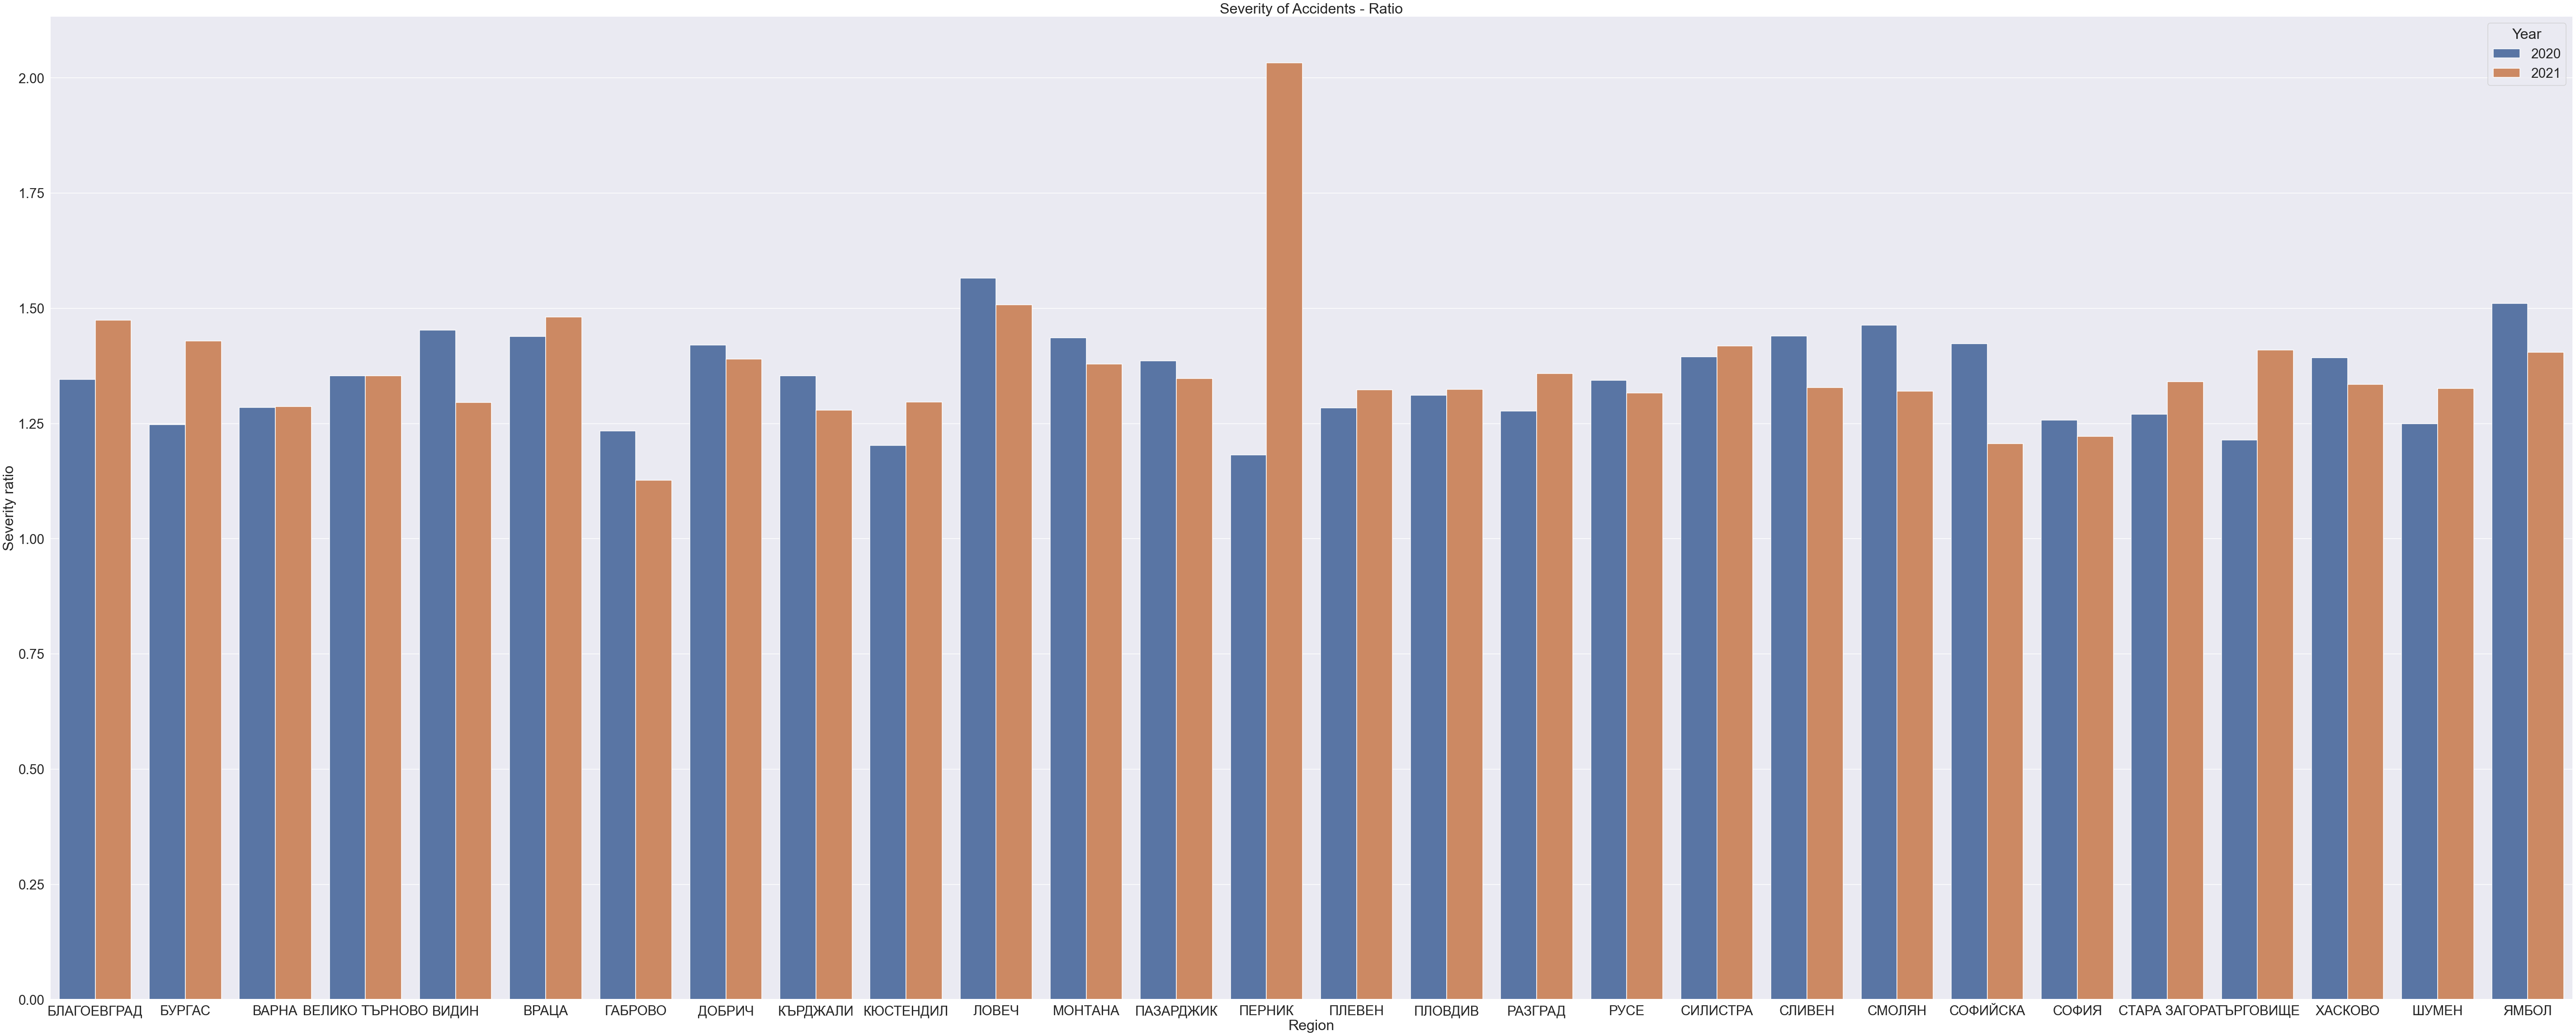

In [67]:
#Plotting severity of accidents
sns.set(rc={'figure.figsize':(100,40)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.barplot(data = for_viz, x = 'Region', y = 'Severity ratio', hue = 'Year').set_title('Severity of Accidents - Ratio')
plt.show()

In [68]:
#Severity of accidents statistical significance
ratio_sign = []
for i in regions:
    #print(i)

    #Create 2 dataframes
    y2020 = for_viz[for_viz['Year']=='2020']
    y2021 = for_viz[for_viz['Year']=='2021']

    #Get mean of each year (deaths)
    y2020_death_mean_reg = y2020[y2020['Region']==i]['Severity ratio'].to_numpy()
    y2021_death_mean_reg = y2021[y2021['Region']==i]['Severity ratio'].to_numpy()

    #Create permutation test
    mean_difference = abs(y2021_death_mean_reg - y2020_death_mean_reg)
    all_deaths = for_viz[col]
    mean_differences = []

    for j in range(1000):
        #Populate two groups randmly
        group_a = []
        group_b = []

        for d in all_deaths: 
            rand_val = np.random.random()
            if rand_val > 0.5:
                group_a.append(d)
            else: 
                group_b.append(d)
        mean_group_a = np.mean(group_a)
        mean_group_b = np.mean(group_b)
        # find the itteration mean and append to our mean difference list
        iteration_mean_difference =  mean_group_a - mean_group_b
        mean_differences.append(iteration_mean_difference)
            
    total = 0

    #for loop to check if random mean diff is greater than our mean difference
    for mean_diff in mean_differences:
        if mean_diff >= mean_difference:
            total += 1

    #p value calculated by calulating percentage of values greater then the mean difference
    p_value = total / 1000

    #print(p_value)

    if p_value > 0.01:
        pass
        #print('NULL HYPOTHESIS CONFIRMED - NO STATISTICAL DIFFERENCE')
    else:
        #print('NULL HYPOTHESIS REJECTED - STATISTICAL DIFFERENCE')
        ratio_sign.append(i)
    #print('\n')
print(ratio_sign)

[]


In [69]:
#No difference in severity between 2020 and 2021
#Plot the asterisk for deaths

In [70]:
for_viz['Statistical Siginificance Deaths'] = ' '
for_viz['Statistical Siginificance Injuries'] = ' '
for_viz['Statistical Significance Occurences'] = ' '

In [71]:
n = 0
for t in tog:
    for index, rows in for_viz.iterrows():
        if rows['Region'] in sign_deaths and n == 0:
            for_viz['Statistical Siginificance Deaths'].iloc[index] = 'Significant'
        elif rows['Region'] in sign_inj and n == 1: 
            for_viz['Statistical Siginificance Injuries'].iloc[index] = 'Significant'
    n += 1 

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [72]:
for_viz

,Deaths,Injured,Year,Region,Occurences,Total,Severity ratio,Statistical Siginificance Deaths,Statistical Siginificance Injuries,Statistical Significance Occurences
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0,1.345382,,,
1,26.0,432.0,2020,БУРГАС,367.0,458.0,1.247956,,Significant,
2,29.0,702.0,2020,ВАРНА,569.0,731.0,1.284710,Significant,,
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0,1.353211,Significant,,
4,14.0,124.0,2020,ВИДИН,95.0,138.0,1.452632,Significant,,
5,14.0,209.0,2020,ВРАЦА,155.0,223.0,1.438710,Significant,,
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0,1.233645,,,
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0,1.420561,,,
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0,1.353535,,,
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0,1.202703,,,


In [73]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,Significant decrease,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,Significant increase,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,Significant decrease,,


In [74]:
to_add = []
_perc = ['Разлика ПТП, %', 'Разлика загинали, %', 'Разлика ранени, %']
_dist = [ 'Разлика ПТП, бр.', 'Разлика загинали, бр.', 'Разлика ранени, бр.']
sign_col = [ 'Statistical Significance Occurences', 'Statistical Significance Deaths', 'Statistical Significance Injuries']

for i in range(len(sign_col)):
     inner_add = []
     for index, rows in df.iterrows():
          if rows[sign_col[i]] != ' ':
               inner_add.append('***' + '\n' + ' %: '+ str(rows[_perc[i]]) +'\n' +' Tot.: ' + str(rows[_dist[i]]))
          else:
               inner_add.append('%: '+ str(rows[_perc[i]]) +'\n' +' Tot.: ' + str(rows[_dist[i]]))
     to_add.append(inner_add)

"""
for index, rows in df.iterrows():
     if rows['Statistical Significance Deaths'] != ' ':
          to_add.append('***' + '\n' + ' %: '+ str(rows['Разлика загинали, %']) +'\n' +' Tot.: ' + str(rows['Разлика загинали, бр.']))
     else:
          to_add.append('%: '+ str(rows['Разлика загинали, %']) +'\n' +' Tot.: ' + str(rows['Разлика загинали, бр.']))

to_add_inj = []
for index, rows in df.iterrows():
     if rows['Statistical Significance Injuries'] != ' ':
          to_add_inj.append('***' + '\n' + ' %: '+ str(rows['Разлика ранени, %']) +'\n' +' Tot.: ' + str(rows['Разлика ранени, бр.']))
     else:
          to_add_inj.append('%: '+ str(rows['Разлика ранени, %']) +'\n' +' Tot.: ' + str(rows['Разлика ранени, бр.']))

to_add_occ = []
for index, rows in df.iterrows():
     if rows['Statistical Significance Occurences'] != ' ':
          to_add_occ.append('***' + '\n' + ' %: '+ str(rows['Разлика ПТП, %']) +'\n' +' Tot.: ' + str(rows['Разлика ПТП, бр.']))
     else:
          to_add_occ.append('%: '+ str(rows['Разлика ПТП, %']) +'\n' +' Tot.: ' + str(rows['Разлика ПТП, бр.']))
     plt.show()
"""


"\nfor index, rows in df.iterrows():\n     if rows['Statistical Significance Deaths'] != ' ':\n          to_add.append('***' + '\n' + ' %: '+ str(rows['Разлика загинали, %']) +'\n' +' Tot.: ' + str(rows['Разлика загинали, бр.']))\n     else:\n          to_add.append('%: '+ str(rows['Разлика загинали, %']) +'\n' +' Tot.: ' + str(rows['Разлика загинали, бр.']))\n\nto_add_inj = []\nfor index, rows in df.iterrows():\n     if rows['Statistical Significance Injuries'] != ' ':\n          to_add_inj.append('***' + '\n' + ' %: '+ str(rows['Разлика ранени, %']) +'\n' +' Tot.: ' + str(rows['Разлика ранени, бр.']))\n     else:\n          to_add_inj.append('%: '+ str(rows['Разлика ранени, %']) +'\n' +' Tot.: ' + str(rows['Разлика ранени, бр.']))\n\nto_add_occ = []\nfor index, rows in df.iterrows():\n     if rows['Statistical Significance Occurences'] != ' ':\n          to_add_occ.append('***' + '\n' + ' %: '+ str(rows['Разлика ПТП, %']) +'\n' +' Tot.: ' + str(rows['Разлика ПТП, бр.']))\n     else:\

In [75]:
to_add[1]

['%: -6.67\n Tot.: -1',
 '%: 7.69\n Tot.: 2',
 '***\n %: -24.14\n Tot.: -7',
 '***\n %: 114.29\n Tot.: 16',
 '***\n %: -57.14\n Tot.: -8',
 '***\n %: 64.29\n Tot.: 9',
 '%: -22.22\n Tot.: -2',
 '%: -27.78\n Tot.: -5',
 '%: -33.33\n Tot.: -2',
 '%: -57.14\n Tot.: -4',
 '***\n %: 70.59\n Tot.: 12',
 '%: 15.38\n Tot.: 2',
 '***\n %: 56.25\n Tot.: 9',
 '***\n %: 1700.0\n Tot.: 51',
 '***\n %: 76.92\n Tot.: 10',
 '%: -10.53\n Tot.: -4',
 '%: -28.57\n Tot.: -4',
 '***\n %: 64.29\n Tot.: 9',
 '%: -25.0\n Tot.: -3',
 '***\n %: -43.48\n Tot.: -10',
 '%: -50.0\n Tot.: -2',
 '%: 0.0\n Tot.: 0',
 '***\n %: 48.57\n Tot.: 17',
 '%: -12.9\n Tot.: -4',
 '%: -20.0\n Tot.: -2',
 '***\n %: 50.0\n Tot.: 7',
 '***\n %: 80.0\n Tot.: 8',
 '%: 40.0\n Tot.: 4']

In [76]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,Significant decrease,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,Significant increase,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,Significant decrease,,


In [77]:
#Plotting deaths
"""
sns.set(rc={'figure.figsize':(200,60)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.set(font_scale=10)
g = sns.barplot(data = for_viz, x = 'Region', y = 'Deaths', hue = 'Year')
g.xaxis.get_major_ticks()
for i in range(len(to_add)): 
    g.text(i,\
         df['Загинали, бр., 2021 г.'][i] + 0.25 if df['Загинали, бр., 2021 г.'][i]>df['Загинали, бр., 2020 г.'][i] else df['Загинали, бр., 2020 г.'][i]+0.25, to_add[i],\
              fontdict = dict(color='black', fontsize=80),\
                  ha='center')
plt.xticks(rotation='90')
plt.show()
"""

'\nsns.set(rc={\'figure.figsize\':(200,60)})\nsns.set_context("paper", rc={"axes.labelsize":36})\nsns.set_context("talk", font_scale=1.8)\nsns.set(font_scale=10)\ng = sns.barplot(data = for_viz, x = \'Region\', y = \'Deaths\', hue = \'Year\')\ng.xaxis.get_major_ticks()\nfor i in range(len(to_add)): \n    g.text(i,         df[\'Загинали, бр., 2021 г.\'][i] + 0.25 if df[\'Загинали, бр., 2021 г.\'][i]>df[\'Загинали, бр., 2020 г.\'][i] else df[\'Загинали, бр., 2020 г.\'][i]+0.25, to_add[i],              fontdict = dict(color=\'black\', fontsize=80),                  ha=\'center\')\nplt.xticks(rotation=\'90\')\nplt.show()\n'

In [78]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,Significant decrease,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,Significant increase,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,Significant decrease,,


In [79]:
to_add[0]

['%: 10.04\n Tot.: 25',
 '%: 7.9\n Tot.: 29',
 '%: -3.34\n Tot.: -19',
 '%: 0.0\n Tot.: 0',
 '%: -25.26\n Tot.: -24',
 '%: 18.06\n Tot.: 28',
 '%: -33.64\n Tot.: -36',
 '%: 14.95\n Tot.: 16',
 '%: 30.3\n Tot.: 30',
 '%: 22.97\n Tot.: 17',
 '%: 27.33\n Tot.: 44',
 '%: 21.05\n Tot.: 28',
 '%: -2.33\n Tot.: -5',
 '%: 12.73\n Tot.: 7',
 '%: 8.65\n Tot.: 18',
 '%: 4.28\n Tot.: 30',
 '%: -5.36\n Tot.: -6',
 '%: 5.26\n Tot.: 15',
 '%: 28.95\n Tot.: 22',
 '%: 50.55\n Tot.: 46',
 '%: -4.88\n Tot.: -4',
 '%: 4.03\n Tot.: 6',
 '%: 4.34\n Tot.: 27',
 '%: 17.76\n Tot.: 54',
 '%: -21.43\n Tot.: -12',
 '%: 1.17\n Tot.: 3',
 '%: 26.72\n Tot.: 31',
 '%: 0.0\n Tot.: 0']

In [80]:
df.head(1)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,


In [81]:
to_add[1]

['%: -6.67\n Tot.: -1',
 '%: 7.69\n Tot.: 2',
 '***\n %: -24.14\n Tot.: -7',
 '***\n %: 114.29\n Tot.: 16',
 '***\n %: -57.14\n Tot.: -8',
 '***\n %: 64.29\n Tot.: 9',
 '%: -22.22\n Tot.: -2',
 '%: -27.78\n Tot.: -5',
 '%: -33.33\n Tot.: -2',
 '%: -57.14\n Tot.: -4',
 '***\n %: 70.59\n Tot.: 12',
 '%: 15.38\n Tot.: 2',
 '***\n %: 56.25\n Tot.: 9',
 '***\n %: 1700.0\n Tot.: 51',
 '***\n %: 76.92\n Tot.: 10',
 '%: -10.53\n Tot.: -4',
 '%: -28.57\n Tot.: -4',
 '***\n %: 64.29\n Tot.: 9',
 '%: -25.0\n Tot.: -3',
 '***\n %: -43.48\n Tot.: -10',
 '%: -50.0\n Tot.: -2',
 '%: 0.0\n Tot.: 0',
 '***\n %: 48.57\n Tot.: 17',
 '%: -12.9\n Tot.: -4',
 '%: -20.0\n Tot.: -2',
 '***\n %: 50.0\n Tot.: 7',
 '***\n %: 80.0\n Tot.: 8',
 '%: 40.0\n Tot.: 4']

In [82]:
for_viz

,Deaths,Injured,Year,Region,Occurences,Total,Severity ratio,Statistical Siginificance Deaths,Statistical Siginificance Injuries,Statistical Significance Occurences
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0,1.345382,,,
1,26.0,432.0,2020,БУРГАС,367.0,458.0,1.247956,,Significant,
2,29.0,702.0,2020,ВАРНА,569.0,731.0,1.284710,Significant,,
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0,1.353211,Significant,,
4,14.0,124.0,2020,ВИДИН,95.0,138.0,1.452632,Significant,,
5,14.0,209.0,2020,ВРАЦА,155.0,223.0,1.438710,Significant,,
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0,1.233645,,,
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0,1.420561,,,
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0,1.353535,,,
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0,1.202703,,,


In [83]:
#TO REACTIVATE '''
'''
viz = ['Occurences', 'Deaths', 'Injured']
cols = [['ПТП, бр., 2021 г.', 'ПТП, бр., 2020 г.'], ['Загинали, бр., 2021 г.', 'Загинали, бр., 2020 г.'], ['Ранени, бр., 2021 г.', 'Ранени, бр., 2020 г.']]
#Without statistical significance
sns.set(rc={'figure.figsize':(200,60)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.set(font_scale=10)
for v in viz: 
    sns.barplot(data = for_viz, x = 'Region', y = v, hue = 'Year').set(title = '2020 vs 2021: ' + v + ' - Without statistical testing')
    plt.xticks(rotation='90')
    plt.show()

#With stat significance
#Plotting Occurrences, Deaths, Injuries
sns.set(rc={'figure.figsize':(200,60)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.set(font_scale=10)

for j in range(len(to_add)):
    g = sns.barplot(data = for_viz, x = 'Region', y = viz[j], hue = 'Year')
    g.set(title = '2020 vs 2021: ' + viz[j] + ' - With statistical significance (p < 0.01)')
    g.xaxis.get_major_ticks()
    for i in range(len(to_add[j])): 
        g.text(i,\
            df[cols[j][0]][i] + 0.25 if df[cols[j][0]][i]>df[cols[j][1]][i] else df[cols[j][1]][i]+0.25, to_add[j][i],\
                fontdict = dict(color='black', fontsize=80),\
                    ha='center')
    plt.xticks(rotation='90')
    plt.show()
'''


"""
#For severity ratio
#Plotting severity of accidents
sns.set(rc={'figure.figsize':(100,40)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
v = sns.barplot(data = for_viz, x = 'Region', y = 'Severity ratio', hue = 'Year').set_title('Severity of Accidents - Ratio')
for i in range(len(to_add[0])):
    v.text(i,\
        for_viz['Severity ratio'][i]+0.25,

    )
plt.show()
"""

"""
sns.set(rc={'figure.figsize':(200,60)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.set(font_scale=10)
g = sns.barplot(data = for_viz, x = 'Region', y = 'Injured', hue = 'Year')
g.xaxis.get_major_ticks()
for i in range(len(to_add_inj)): 
    g.text(i,\
         df['Ранени, бр., 2021 г.'][i] + 0.25 if df['Ранени, бр., 2021 г.'][i]>df['Ранени, бр., 2020 г.'][i] else df['Ранени, бр., 2020 г.'][i]+0.25, to_add_inj[i],\
              fontdict = dict(color='black', fontsize=80),\
                  ha='center')
plt.xticks(rotation='90')
plt.show()
"""

'\nsns.set(rc={\'figure.figsize\':(200,60)})\nsns.set_context("paper", rc={"axes.labelsize":36})\nsns.set_context("talk", font_scale=1.8)\nsns.set(font_scale=10)\ng = sns.barplot(data = for_viz, x = \'Region\', y = \'Injured\', hue = \'Year\')\ng.xaxis.get_major_ticks()\nfor i in range(len(to_add_inj)): \n    g.text(i,         df[\'Ранени, бр., 2021 г.\'][i] + 0.25 if df[\'Ранени, бр., 2021 г.\'][i]>df[\'Ранени, бр., 2020 г.\'][i] else df[\'Ранени, бр., 2020 г.\'][i]+0.25, to_add_inj[i],              fontdict = dict(color=\'black\', fontsize=80),                  ha=\'center\')\nplt.xticks(rotation=\'90\')\nplt.show()\n'

In [84]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28,1119,51,1388,Significant decrease,,
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69,436,44,546,Significant increase,,
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65,166,20,210,Significant decrease,,


In [85]:
#Plotting Occurences 
"""
sns.set(rc={'figure.figsize':(200,60)})
sns.set_context("paper", rc={"axes.labelsize":36})
sns.set_context("talk", font_scale=1.8)
sns.set(font_scale=10)
g = sns.barplot(data = for_viz, x = 'Region', y = 'Injured', hue = 'Year')
g.xaxis.get_major_ticks()
for i in range(len(to_add[2])): 
    g.text(i,\
         df['ПТП, бр., 2021 г.'][i] + 0.25 if df['ПТП, бр., 2021 г.'][i]>df['ПТП, бр., 2020 г.'][i] else df['ПТП, бр., 2020 г.'][i]+0.25, to_add[i],\
              fontdict = dict(color='black', fontsize=80),\
                  ha='center')
plt.xticks(rotation='90')
plt.show()
"""

'\nsns.set(rc={\'figure.figsize\':(200,60)})\nsns.set_context("paper", rc={"axes.labelsize":36})\nsns.set_context("talk", font_scale=1.8)\nsns.set(font_scale=10)\ng = sns.barplot(data = for_viz, x = \'Region\', y = \'Injured\', hue = \'Year\')\ng.xaxis.get_major_ticks()\nfor i in range(len(to_add[2])): \n    g.text(i,         df[\'ПТП, бр., 2021 г.\'][i] + 0.25 if df[\'ПТП, бр., 2021 г.\'][i]>df[\'ПТП, бр., 2020 г.\'][i] else df[\'ПТП, бр., 2020 г.\'][i]+0.25, to_add[i],              fontdict = dict(color=\'black\', fontsize=80),                  ha=\'center\')\nplt.xticks(rotation=\'90\')\nplt.show()\n'

In [86]:
df.sort_values('Разлика ранени, бр.', ascending = False)

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %",Total Occurrences,Total Deaths,Total Injuries,Statistical Significance Deaths,Statistical Significance Injuries,Statistical Significance Occurences
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54,763,54,970,,Significant increase,
23,СТАРА ЗАГОРА,358,27,453,304,31,355,54,17.76,-4,-12.90,98,27.61,662,58,808,,Significant increase,
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88,523,29,710,,,
19,СЛИВЕН,137,13,169,91,23,108,46,50.55,-10,-43.48,61,56.48,228,36,277,Significant decrease,,
15,ПЛОВДИВ,731,34,934,701,38,881,30,4.28,-4,-10.53,53,6.02,1432,72,1815,,,
10,ЛОВЕЧ,205,29,280,161,17,235,44,27.33,12,70.59,45,19.15,366,46,515,Significant increase,,
26,ШУМЕН,147,18,177,116,10,135,31,26.72,8,80.00,42,31.11,263,28,312,Significant increase,,
5,ВРАЦА,183,23,248,155,14,209,28,18.06,9,64.29,39,18.66,338,37,457,Significant increase,,
18,СИЛИСТРА,98,9,130,76,12,94,22,28.95,-3,-25.00,36,38.30,174,21,224,,,
8,КЪРДЖАЛИ,129,4,161,99,6,128,30,30.30,-2,-33.33,33,25.78,228,10,289,,,


In [87]:
#df.to_csv('results3')

In [88]:
#Create a map

In [89]:
df['Области'].to_numpy()

array(['БЛАГОЕВГРАД', 'БУРГАС', 'ВАРНА', 'ВЕЛИКО ТЪРНОВО', 'ВИДИН',
       'ВРАЦА', 'ГАБРОВО', 'ДОБРИЧ', 'КЪРДЖАЛИ', 'КЮСТЕНДИЛ', 'ЛОВЕЧ',
       'МОНТАНА', 'ПАЗАРДЖИК', 'ПЕРНИК', 'ПЛЕВЕН', 'ПЛОВДИВ', 'РАЗГРАД',
       'РУСЕ', 'СИЛИСТРА', 'СЛИВЕН', 'СМОЛЯН', 'СОФИЙСКА', 'СОФИЯ',
       'СТАРА ЗАГОРА', 'ТЪРГОВИЩЕ', 'ХАСКОВО', 'ШУМЕН', 'ЯМБОЛ'],
      dtype=object)

In [90]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("СОФИЯ")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  42.6977028
The longitude of the location is:  23.3217359


In [91]:
cat_cols = ['Deaths', 'Injuries', 'Occurences']
cat = []
for c in range(len(cat_cols)):
    print('here')
    one = []
    increase = []
    decrease = []
    neutral = []
    for index, rows in df.iterrows():
        if 'increase' in rows['Statistical Significance '+cat_cols[c]]: 
            increase.append(rows['Области'])
        elif 'decrease' in rows['Statistical Significance '+cat_cols[c]]: 
            decrease.append(rows['Области'])
        else: 
            pass
    one = [increase, decrease, neutral]
    cat.append(one)

here
here
here


In [92]:
'''
increase_coor = []
decrease_coor = []
neutral_coor = []

cat_coor = []
for i in range(len(cat)):
    for j in range(len(cat[i])):
        increase_coor = []
        decrease_coor = []
        neutral_coor = []
        one_coor = []
        for k in range(len(cat[i][j])):

            # Initialize Nominatim API
           
            if i == 0: 
                if cat[i][j] == '': 
                    break
                else: 
                    geolocator = Nominatim(user_agent="MyApp")
                    location = geolocator.geocode(cat[i][j][k])
                    increase_coor.append((location.latitude, location.longitude))
            
            elif i == 1: 
                if cat[i][j] == '':
                    break
                else: 
                    geolocator = Nominatim(user_agent="MyApp")
                    location = geolocator.geocode(cat[i][j][k])
                    decrease_coor.append((location.latitude, location.longitude))
        one_coor = [increase_coor, decrease_coor, neutral_coor]
        cat_coor.append(one_coor)
'''

'\nincrease_coor = []\ndecrease_coor = []\nneutral_coor = []\n\ncat_coor = []\nfor i in range(len(cat)):\n    for j in range(len(cat[i])):\n        increase_coor = []\n        decrease_coor = []\n        neutral_coor = []\n        one_coor = []\n        for k in range(len(cat[i][j])):\n\n            # Initialize Nominatim API\n           \n            if i == 0: \n                if cat[i][j] == \'\': \n                    break\n                else: \n                    geolocator = Nominatim(user_agent="MyApp")\n                    location = geolocator.geocode(cat[i][j][k])\n                    increase_coor.append((location.latitude, location.longitude))\n            \n            elif i == 1: \n                if cat[i][j] == \'\':\n                    break\n                else: \n                    geolocator = Nominatim(user_agent="MyApp")\n                    location = geolocator.geocode(cat[i][j][k])\n                    decrease_coor.append((location.latitude, location.

In [93]:
'''
import time
df['lat'] = ''
df['long'] = ''

def lat(city):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(city)
    return location.latitude
def long(city):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(city)
    return location.longitude

df['long'] = df['Области'].apply(long)
time.sleep(120)
df['lat'] = df['Области'].apply(lat)
'''

'\nimport time\ndf[\'lat\'] = \'\'\ndf[\'long\'] = \'\'\n\ndef lat(city):\n    geolocator = Nominatim(user_agent="MyApp")\n    location = geolocator.geocode(city)\n    return location.latitude\ndef long(city):\n    geolocator = Nominatim(user_agent="MyApp")\n    location = geolocator.geocode(city)\n    return location.longitude\n\ndf[\'long\'] = df[\'Области\'].apply(long)\ntime.sleep(120)\ndf[\'lat\'] = df[\'Области\'].apply(lat)\n'

In [95]:
lat_long = pd.read_csv('lat-long-car accidents.csv')

In [96]:
lat_long = lat_long[lat_long.columns[-2:]]

In [97]:
df = pd.concat([df, lat_long], axis = 1)

In [98]:
#Correcting Montana
df['lat'].iloc[11] = 43.4125
df['long'].iloc[11] = 23.225

#Correcting Burgas
df['lat'].iloc[1] = 42.50606
df['long'].iloc[1] = 27.46781

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [100]:
df['sig_star_deaths'] = ''
df['sig_star_inj'] = ''
df['sig_star_occ'] = ''

def stars(data): 
    if 'Significant' in data:
        return '***'
    else: 
        return ''

add_star = ['sig_star_deaths', 'sig_star_inj', 'sig_star_occ']
cols = ['Statistical Significance Deaths', 'Statistical Significance Injuries', 'Statistical Significance Occurences']
for i in range(len(add_star)):
    df[add_star[i]] = df[cols[i]].apply(stars)


In [101]:
for_viz['sig_star_deaths'] = ''
for_viz['sig_star_inj'] = ''
for_viz['sig_star_occ'] = ''

add_star = ['sig_star_deaths', 'sig_star_inj', 'sig_star_occ']
col_viz = ['Statistical Siginificance Deaths', 'Statistical Siginificance Injuries', 'Statistical Significance Occurences']
for i in range(len(add_star)):
    for_viz[add_star[i]] = for_viz[col_viz[i]].apply(stars)


In [102]:
for_viz

,Deaths,Injured,Year,Region,Occurences,Total,Severity ratio,Statistical Siginificance Deaths,Statistical Siginificance Injuries,Statistical Significance Occurences,sig_star_deaths,sig_star_inj,sig_star_occ
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0,1.345382,,,,,,
1,26.0,432.0,2020,БУРГАС,367.0,458.0,1.247956,,Significant,,,***,
2,29.0,702.0,2020,ВАРНА,569.0,731.0,1.284710,Significant,,,***,,
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0,1.353211,Significant,,,***,,
4,14.0,124.0,2020,ВИДИН,95.0,138.0,1.452632,Significant,,,***,,
5,14.0,209.0,2020,ВРАЦА,155.0,223.0,1.438710,Significant,,,***,,
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0,1.233645,,,,,,
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0,1.420561,,,,,,
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0,1.353535,,,,,,
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0,1.202703,,,,,,


In [103]:
def neutral(data): 
    if data == ' ': 
        return 'No change'
    else: 
        return data

cols = ['Statistical Significance Deaths', 'Statistical Significance Injuries', 'Statistical Significance Occurences']
for i in range(len(cols)):
    df[cols[i]] = df[cols[i]].apply(neutral)

In [129]:
def color(data): 
    if 'No' in data: 
        return 'grey'
    elif 'decrease' in data: 
        return 'green'
    else: 
        return 'red'
df['color_deaths'] = df['Statistical Significance Deaths'].apply(color)

In [146]:
import plotly.express as px

fig = px.scatter_geo(df, lon='long',\
     lat='lat',\
          hover_name='Области',\
               color = 'Statistical Significance Deaths',\
                    color_discrete_sequence = ['grey', 'green', 'red'],\
                        scope='europe',\
                            center=dict(lat=42.733883, lon=25.48583),\
                                title = 'Deaths - Difference between years')
fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=42.733883,
            lon=25.48583
        ),
        scope='europe',
        projection_scale=15
    )
)
fig.update_traces(marker=dict(size=25))
fig.show()

In [107]:
df.columns

Index(['Области', 'ПТП, бр., 2021 г.', 'Загинали, бр., 2021 г.',
       'Ранени, бр., 2021 г.', 'ПТП, бр., 2020 г.', 'Загинали, бр., 2020 г.',
       'Ранени, бр., 2020 г.', 'Разлика ПТП, бр.', 'Разлика ПТП, %',
       'Разлика загинали, бр.', 'Разлика загинали, %', 'Разлика ранени, бр.',
       'Разлика ранени, %', 'Total Occurrences', 'Total Deaths',
       'Total Injuries', 'Statistical Significance Deaths',
       'Statistical Significance Injuries',
       'Statistical Significance Occurences', 'lat', 'long', 'sig_star_deaths',
       'sig_star_inj', 'sig_star_occ'],
      dtype='object')

In [108]:
death_diff = pd.Series(np.concatenate((df['Разлика загинали, бр.'],  df['Разлика загинали, бр.']), axis=0))
inj_diff = pd.Series(np.concatenate((df['Разлика ранени, бр.'],  df['Разлика ранени, бр.']), axis=0))
occ_diff = pd.Series(np.concatenate((df['Разлика ПТП, бр.'],  df['Разлика ПТП, бр.']), axis=0))

death_p_diff = pd.Series(np.concatenate((df['Разлика загинали, %'],  df['Разлика загинали, %']), axis=0))
inj_p_diff = pd.Series(np.concatenate((df['Разлика ранени, %'],  df['Разлика ранени, %']), axis=0))
occ_p_diff = pd.Series(np.concatenate((df['Разлика ПТП, %'],  df['Разлика ПТП, %']), axis=0))


In [109]:
for_viz = pd.concat([for_viz, death_diff, inj_diff, occ_diff], axis = 1)
for_viz.rename({
    0: 'Total death difference',
    1: 'Total injury difference',
    2: 'Total occurrence difference'
}, axis = 1,inplace = True)
for_viz = pd.concat([for_viz, death_p_diff, inj_p_diff, occ_p_diff], axis = 1)
for_viz.rename({
    0: 'Percentage death difference',
    1: 'Percentage injury difference',
    2: 'Percentage occurrence difference'
}, axis = 1,inplace = True)

In [110]:
for_viz

,Deaths,Injured,Year,Region,Occurences,Total,Severity ratio,Statistical Siginificance Deaths,Statistical Siginificance Injuries,Statistical Significance Occurences,sig_star_deaths,sig_star_inj,sig_star_occ,Total death difference,Total injury difference,Total occurrence difference,Percentage death difference,Percentage injury difference,Percentage occurrence difference
0,15.0,320.0,2020,БЛАГОЕВГРАД,249.0,335.0,1.345382,,,,,,,-1,70,25,-6.67,21.88,10.04
1,26.0,432.0,2020,БУРГАС,367.0,458.0,1.247956,,Significant,,,***,,2,106,29,7.69,24.54,7.90
2,29.0,702.0,2020,ВАРНА,569.0,731.0,1.284710,Significant,,,***,,,-7,-16,-19,-24.14,-2.28,-3.34
3,14.0,281.0,2020,ВЕЛИКО ТЪРНОВО,218.0,295.0,1.353211,Significant,,,***,,,16,-16,0,114.29,-5.69,0.00
4,14.0,124.0,2020,ВИДИН,95.0,138.0,1.452632,Significant,,,***,,,-8,-38,-24,-57.14,-30.65,-25.26
5,14.0,209.0,2020,ВРАЦА,155.0,223.0,1.438710,Significant,,,***,,,9,39,28,64.29,18.66,18.06
6,9.0,123.0,2020,ГАБРОВО,107.0,132.0,1.233645,,,,,,,-2,-50,-36,-22.22,-40.65,-33.64
7,18.0,134.0,2020,ДОБРИЧ,107.0,152.0,1.420561,,,,,,,-5,24,16,-27.78,17.91,14.95
8,6.0,128.0,2020,КЪРДЖАЛИ,99.0,134.0,1.353535,,,,,,,-2,33,30,-33.33,25.78,30.30
9,7.0,82.0,2020,КЮСТЕНДИЛ,74.0,89.0,1.202703,,,,,,,-4,33,17,-57.14,40.24,22.97


In [111]:
#Creating text above graph
'''
tool = [['sig_star_deaths', -6, -3], ['sig_star_inj', -5, -2], ['sig_star_occ', -4, -1]]
to_add = ['deaths', 'injuries', 'occurrences']

for i in range(len(tool)): 
    #STAR TO ADD LATER
    #for_viz[tool[i][0]] + 
    for_viz['tooltip ' + to_add[i]] = '\n'+'Tot.: '+for_viz.iloc[:, 1] + '\n'+'%: '+for_viz.iloc[:, 2]
'''
for_viz['tooltip deaths'] = for_viz['sig_star_deaths'] + '\n' + 'Tot.:' + for_viz['Total death difference'].astype(str) + '\n' + 'Perc.:' + for_viz['Percentage death difference'].astype(str)+'%'

In [149]:
import plotly.graph_objects as go
texts = for_viz['sig_star_deaths'].to_numpy().tolist()
fig = px.bar(for_viz,\
     x='Region',\
     y='Deaths',\
     color = 'Year',\
     barmode = 'group',\
    hover_data=['Total death difference', 'Percentage death difference'],
    title = 'Year differences for deaths - with statistical significance (p < 0.05)')
fig.update_traces(texttemplate = texts, textposition = 'outside')

fig.show()

In [150]:
for_viz.to_csv('for_bar')
df.to_csv('for_geo')

In [ ]:
fig = go.Figure(
    data = go.Scattergeo(
        
    )
)